# MUFG DataScience Challenge 2025 - Exploratory Data Analysis

This notebook performs exploratory data analysis on the crowdfunding dataset to understand patterns and relationships in the data.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Data Loading and Basic Inspection

In [59]:
# Load the training data
train_df = pd.read_csv('../../data/raw/train.csv')

print(f"Dataset shape: {train_df.shape}")
print(f"\nColumn names:")
print(train_df.columns.tolist())

Dataset shape: (75690, 13)

Column names:
['id', 'name', 'desc', 'goal', 'keywords', 'disable_communication', 'country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'final_status']


In [60]:
# Display first few rows
train_df.head()

id                                               name  \
0  train_00000                  Homo Sapiens - A Species Gone Ape   
1  train_00001  Manoa Journal of Fried and Half-Fried Ideas ab...   
2  train_00002            Become a Special Friend to RAW GERONIMO   
3  train_00003  Field Trip to the Sunrise:  A Chicago Kids Adv...   
4  train_00004                            Ciara's Bakery and Cafe   

                                                desc     goal  \
0  Homo Sapiens A Species Gone Ape, is a narrativ...  11250.0   
1  The Fried Journal is about exploring the futur...   2100.0   
2  RAW GERONIMO are looking to shoot a music vide...   2000.0   
3  ...About a 2nd grader who happens to have a te...   4000.0   
4  My dream is to open up a full service bakery a...  40000.0   

                                            keywords  disable_communication  \
0                    homo-sapiens-a-species-gone-ape                  False   
1  manoa-journal-of-fried-and-half-fried-ideas-about                  False   
2            become-a-special-friend-to-raw-geronimo                  False   
3  field-trip-to-the-sunrise-a-chicago-kids-adven...                  False   
4                             ciaras-bakery-and-cafe                  False   

  country currency    deadline  state_changed_at  created_at  launched_at  \
0      US      USD  1393531464        1393531464  1388503014   1390939464   
1      US      USD  1323558480        1323558481  1319762221   1320128440   
2      US      USD  1325732983        1325732983  1322956721   1323140983   
3      US      USD  1369972740        1369972740  1368190634   1368493243   
4      US      USD  1429209087        1429209087  1423516929   1426617087   

   final_status  
0             0  
1             0  
2             0  
3             0  
4             0

In [61]:
# Basic info about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75690 entries, 0 to 75689
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     75690 non-null  object 
 1   name                   75688 non-null  object 
 2   desc                   75683 non-null  object 
 3   goal                   75690 non-null  float64
 4   keywords               75690 non-null  object 
 5   disable_communication  75690 non-null  bool   
 6   country                75690 non-null  object 
 7   currency               75690 non-null  object 
 8   deadline               75690 non-null  int64  
 9   state_changed_at       75690 non-null  int64  
 10  created_at             75690 non-null  int64  
 11  launched_at            75690 non-null  int64  
 12  final_status           75690 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 7.0+ MB


In [62]:
# Check data types and basic statistics
train_df.describe()

goal      deadline  state_changed_at    created_at  \
count  7.569000e+04  7.569000e+04      7.569000e+04  7.569000e+04   
mean   3.903525e+04  1.380196e+09      1.380101e+09  1.373985e+09   
std    1.090118e+06  4.266444e+07      4.262585e+07  4.267451e+07   
min    1.000000e-02  1.241334e+09      1.241334e+09  1.240601e+09   
25%    2.000000e+03  1.346712e+09      1.346660e+09  1.340106e+09   
50%    5.000000e+03  1.393213e+09      1.393175e+09  1.384209e+09   
75%    1.300000e+04  1.415681e+09      1.415521e+09  1.409617e+09   
max    1.000000e+08  1.433097e+09      1.433097e+09  1.432325e+09   

        launched_at  final_status  
count  7.569000e+04  75690.000000  
mean   1.377251e+09      0.319527  
std    4.290186e+07      0.466296  
min    1.240603e+09      0.000000  
25%    1.343848e+09      0.000000  
50%    1.390454e+09      0.000000  
75%    1.412798e+09      1.000000  
max    1.432658e+09      1.000000

## 2. Target Variable Analysis

Target variable distribution:
final_status
0    51505
1    24185
Name: count, dtype: int64

Success rate: 31.95%


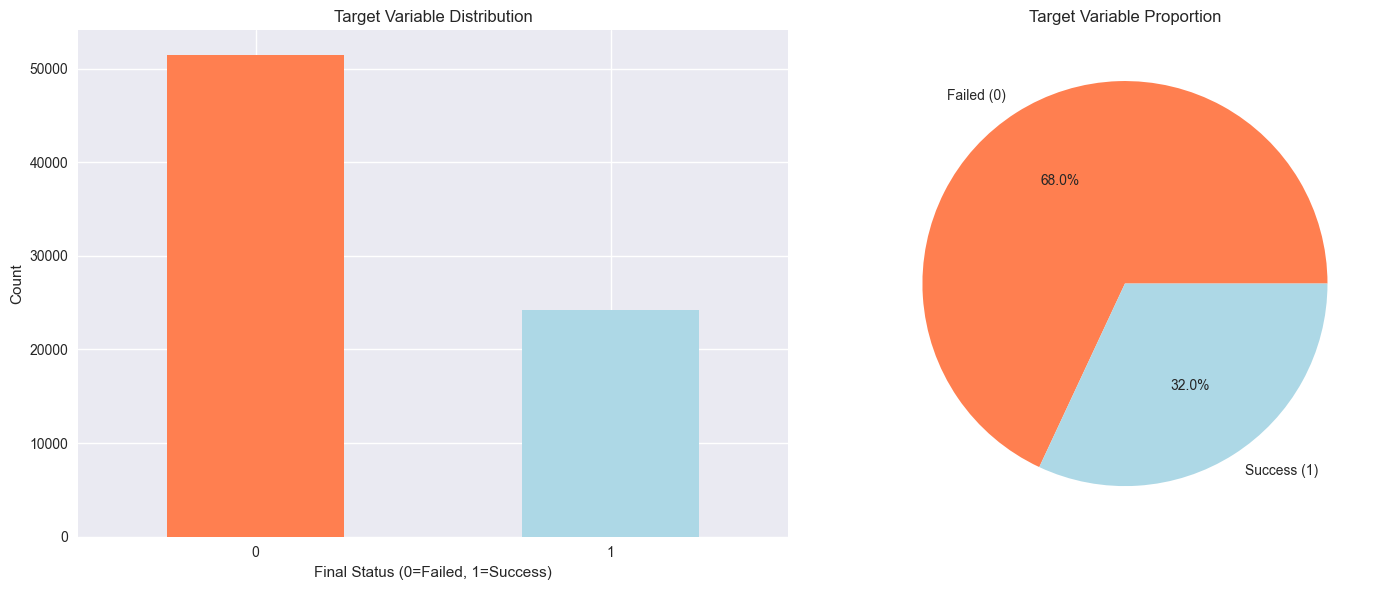

In [63]:
# Target variable distribution
target_counts = train_df['final_status'].value_counts()
print("Target variable distribution:")
print(target_counts)
print(f"\nSuccess rate: {target_counts[1] / len(train_df) * 100:.2f}%")

# Visualize target distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_counts.plot(kind='bar', ax=ax1, color=['coral', 'lightblue'])
ax1.set_title('Target Variable Distribution')
ax1.set_xlabel('Final Status (0=Failed, 1=Success)')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=0)

# Pie chart
ax2.pie(target_counts.values, labels=['Failed (0)', 'Success (1)'], 
        autopct='%1.1f%%', colors=['coral', 'lightblue'])
ax2.set_title('Target Variable Proportion')

plt.tight_layout()
plt.show()

## 3. Missing Values Analysis

In [64]:
# Check for missing values
missing_data = train_df.isnull().sum()
missing_percentage = (missing_data / len(train_df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Missing values summary:")
    print(missing_df)
else:
    print("No missing values found in the dataset!")

Missing values summary:
      Missing Count  Missing Percentage
desc              7            0.009248
name              2            0.002642


## 4. Numerical Features Analysis

In [65]:
# Identify numerical columns
numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Statistical summary of numerical features
train_df[numerical_cols].describe()

Numerical columns: ['goal', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'final_status']


goal      deadline  state_changed_at    created_at  \
count  7.569000e+04  7.569000e+04      7.569000e+04  7.569000e+04   
mean   3.903525e+04  1.380196e+09      1.380101e+09  1.373985e+09   
std    1.090118e+06  4.266444e+07      4.262585e+07  4.267451e+07   
min    1.000000e-02  1.241334e+09      1.241334e+09  1.240601e+09   
25%    2.000000e+03  1.346712e+09      1.346660e+09  1.340106e+09   
50%    5.000000e+03  1.393213e+09      1.393175e+09  1.384209e+09   
75%    1.300000e+04  1.415681e+09      1.415521e+09  1.409617e+09   
max    1.000000e+08  1.433097e+09      1.433097e+09  1.432325e+09   

        launched_at  final_status  
count  7.569000e+04  75690.000000  
mean   1.377251e+09      0.319527  
std    4.290186e+07      0.466296  
min    1.240603e+09      0.000000  
25%    1.343848e+09      0.000000  
50%    1.390454e+09      0.000000  
75%    1.412798e+09      1.000000  
max    1.432658e+09      1.000000

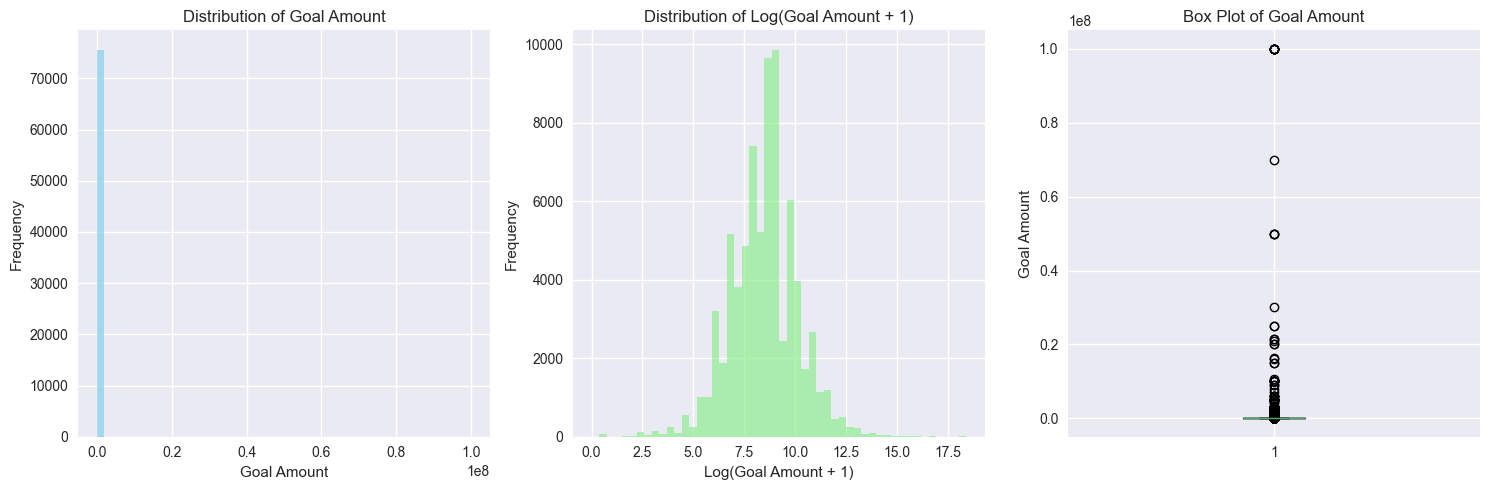

In [66]:
# Distribution of goal amounts
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(train_df['goal'], bins=50, alpha=0.7, color='skyblue')
plt.title('Distribution of Goal Amount')
plt.xlabel('Goal Amount')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(np.log1p(train_df['goal']), bins=50, alpha=0.7, color='lightgreen')
plt.title('Distribution of Log(Goal Amount + 1)')
plt.xlabel('Log(Goal Amount + 1)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.boxplot(train_df['goal'])
plt.title('Box Plot of Goal Amount')
plt.ylabel('Goal Amount')

plt.tight_layout()
plt.show()

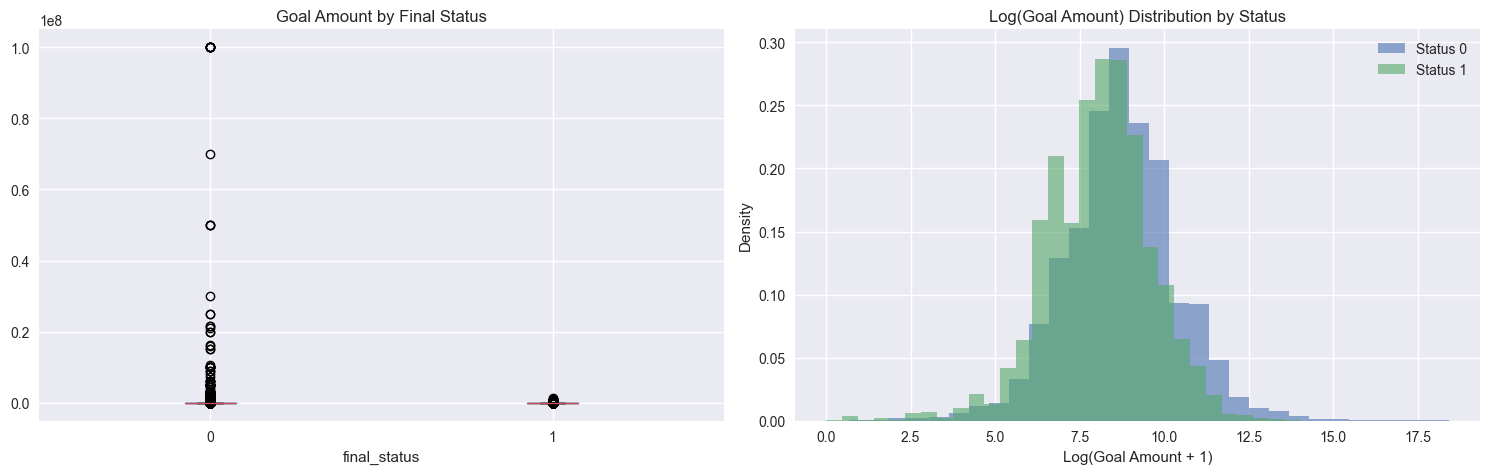

Goal amount statistics by final status:
                count          mean           std   min     25%     50%  \
final_status                                                              
0             51505.0  52793.515700  1.321112e+06  1.00  2200.0  5250.0   
1             24185.0   9735.301161  3.102772e+04  0.01  1100.0  3150.0   

                  75%          max  
final_status                        
0             15000.0  100000000.0  
1              8500.0    1250000.0  


In [67]:
# Goal amount by success/failure
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
train_df.boxplot(column='goal', by='final_status', ax=plt.gca())
plt.title('Goal Amount by Final Status')
plt.suptitle('')

plt.subplot(1, 2, 2)
for status in [0, 1]:
    subset = train_df[train_df['final_status'] == status]
    plt.hist(np.log1p(subset['goal']), bins=30, alpha=0.6, 
             label=f'Status {status}', density=True)
plt.title('Log(Goal Amount) Distribution by Status')
plt.xlabel('Log(Goal Amount + 1)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

# Statistical comparison
print("Goal amount statistics by final status:")
print(train_df.groupby('final_status')['goal'].describe())

## 5. Temporal Features Analysis

In [68]:
# Convert timestamp columns to datetime
timestamp_cols = ['deadline', 'state_changed_at', 'created_at', 'launched_at']

for col in timestamp_cols:
    train_df[f'{col}_dt'] = pd.to_datetime(train_df[col], unit='s')

# Display sample of converted timestamps
print("Sample of converted timestamps:")
print(train_df[['deadline', 'deadline_dt', 'created_at', 'created_at_dt']].head())

Sample of converted timestamps:
     deadline         deadline_dt  created_at       created_at_dt
0  1393531464 2014-02-27 20:04:24  1388503014 2013-12-31 15:16:54
1  1323558480 2011-12-10 23:08:00  1319762221 2011-10-28 00:37:01
2  1325732983 2012-01-05 03:09:43  1322956721 2011-12-03 23:58:41
3  1369972740 2013-05-31 03:59:00  1368190634 2013-05-10 12:57:14
4  1429209087 2015-04-16 18:31:27  1423516929 2015-02-09 21:22:09


In [69]:
# Create derived temporal features
train_df['campaign_duration'] = (train_df['deadline_dt'] - train_df['launched_at_dt']).dt.days
train_df['prep_time'] = (train_df['launched_at_dt'] - train_df['created_at_dt']).dt.days

# Extract date components
train_df['launch_year'] = train_df['launched_at_dt'].dt.year
train_df['launch_month'] = train_df['launched_at_dt'].dt.month
train_df['launch_day_of_week'] = train_df['launched_at_dt'].dt.dayofweek

print("Sample of derived temporal features:")
print(train_df[['campaign_duration', 'prep_time', 'launch_year', 'launch_month']].head())

Sample of derived temporal features:
   campaign_duration  prep_time  launch_year  launch_month
0                 30         28         2014             1
1                 39          4         2011            11
2                 30          2         2011            12
3                 17          3         2013             5
4                 30         35         2015             3


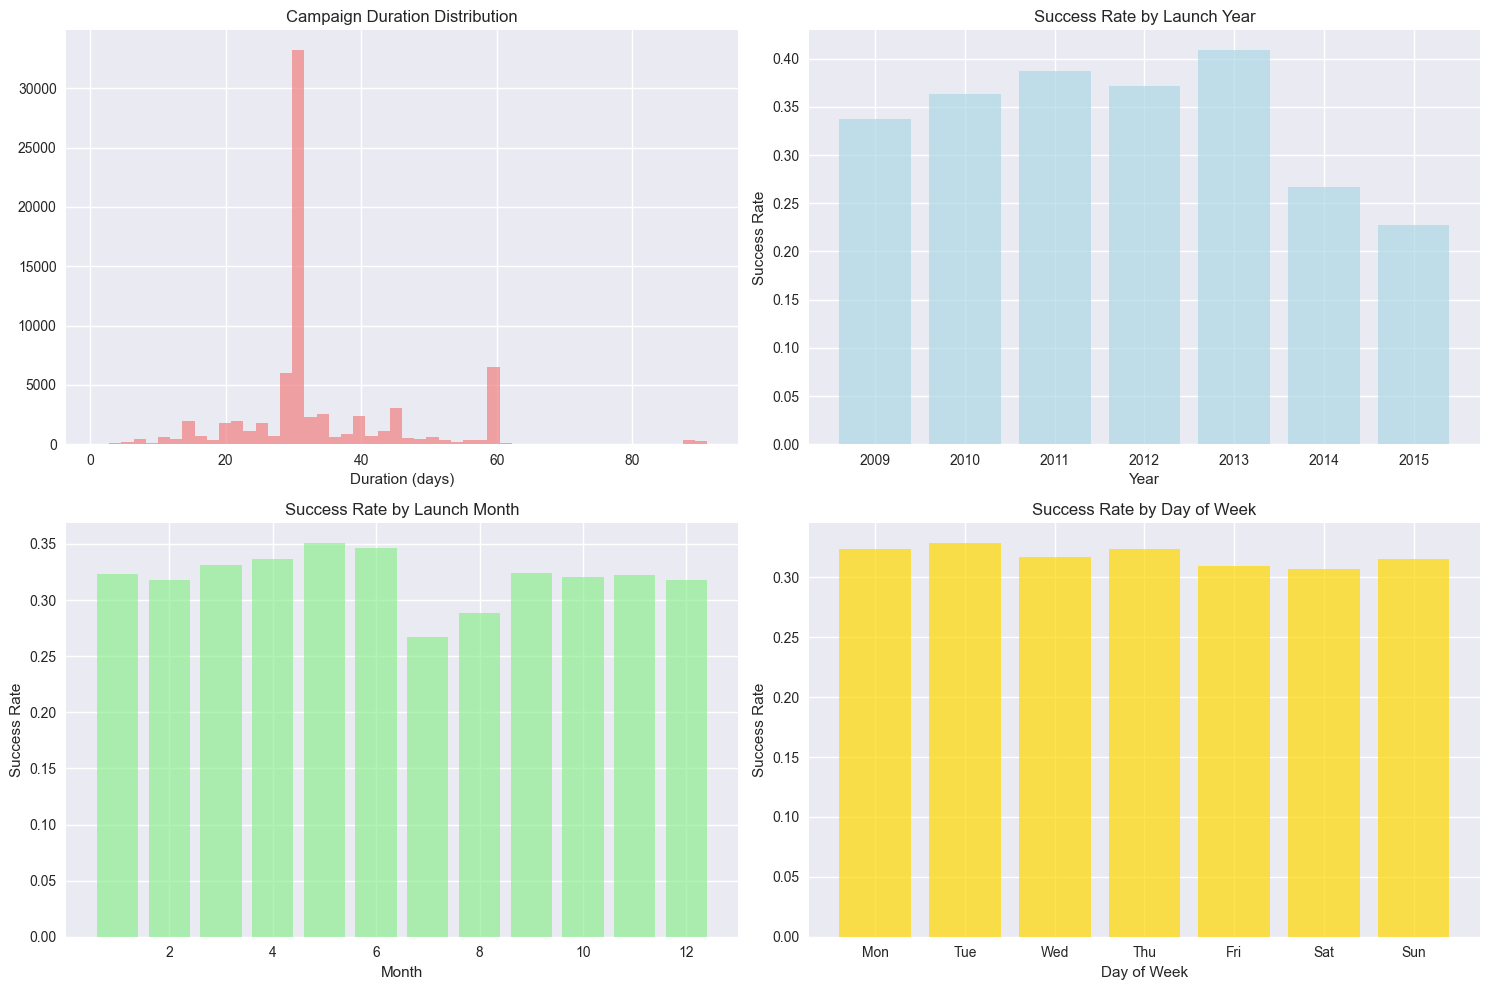

In [70]:
# Analyze temporal patterns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Campaign duration distribution
axes[0,0].hist(train_df['campaign_duration'], bins=50, alpha=0.7, color='lightcoral')
axes[0,0].set_title('Campaign Duration Distribution')
axes[0,0].set_xlabel('Duration (days)')

# Success rate by launch year
yearly_success = train_df.groupby('launch_year')['final_status'].agg(['count', 'mean']).reset_index()
axes[0,1].bar(yearly_success['launch_year'], yearly_success['mean'], alpha=0.7, color='lightblue')
axes[0,1].set_title('Success Rate by Launch Year')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Success Rate')

# Success rate by launch month
monthly_success = train_df.groupby('launch_month')['final_status'].mean()
axes[1,0].bar(monthly_success.index, monthly_success.values, alpha=0.7, color='lightgreen')
axes[1,0].set_title('Success Rate by Launch Month')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Success Rate')

# Success rate by day of week
dow_success = train_df.groupby('launch_day_of_week')['final_status'].mean()
dow_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[1,1].bar(range(7), dow_success.values, alpha=0.7, color='gold')
axes[1,1].set_title('Success Rate by Day of Week')
axes[1,1].set_xlabel('Day of Week')
axes[1,1].set_ylabel('Success Rate')
axes[1,1].set_xticks(range(7))
axes[1,1].set_xticklabels(dow_labels)

plt.tight_layout()
plt.show()

In [71]:
## 5.1. Advanced Temporal Analysis - Preparation & Campaign Timing

# Deep dive into temporal patterns focusing on preparation time, campaign duration, and state change timing patterns.

In [72]:
# Create advanced temporal features
def create_advanced_time_features(df):
    """Create advanced temporal features with data cleaning"""
    df = df.copy()
    
    # Calculate time intervals in days
    df['preparation_days'] = (df['launched_at'] - df['created_at']) / (24*3600)
    df['campaign_days'] = (df['deadline'] - df['launched_at']) / (24*3600)  
    df['state_change_days'] = (df['state_changed_at'] - df['launched_at']) / (24*3600)
    
    # Calculate state change ratio (when during campaign the state changed)
    df['state_change_ratio'] = df['state_change_days'] / df['campaign_days']
    
    return df

# Apply advanced feature engineering
print("Creating advanced temporal features...")
train_df = create_advanced_time_features(train_df)

# Check for data quality issues (negative time intervals)
print("\n=== DATA QUALITY CHECK ===")
print("Checking for negative time intervals...")

negative_prep = (train_df['preparation_days'] < 0).sum()
negative_campaign = (train_df['campaign_days'] < 0).sum()

print(f"Projects with negative preparation time: {negative_prep}")
print(f"Projects with negative campaign duration: {negative_campaign}")

# Remove projects with negative time intervals
original_size = len(train_df)
train_df = train_df[
    (train_df['preparation_days'] >= 0) & 
    (train_df['campaign_days'] >= 0)
].copy()

eliminated_count = original_size - len(train_df)
print(f"\nüìä ELIMINATED {eliminated_count} projects with invalid time intervals")
print(f"Remaining projects: {len(train_df):,} (was {original_size:,})")

Creating advanced temporal features...

=== DATA QUALITY CHECK ===
Checking for negative time intervals...
Projects with negative preparation time: 0
Projects with negative campaign duration: 0

üìä ELIMINATED 0 projects with invalid time intervals
Remaining projects: 75,690 (was 75,690)


In [73]:
# Statistical analysis of temporal features
print("=== STATISTICAL ANALYSIS OF TEMPORAL FEATURES ===")

temporal_features = ['preparation_days', 'campaign_days', 'state_change_days', 'state_change_ratio']

print("\nOverall Statistics:")
stats_df = train_df[temporal_features].describe()
print(stats_df.round(2))

print("\n" + "="*60)
print("TEMPORAL FEATURES BY SUCCESS STATUS")
print("="*60)

# Analysis by success status
for feature in ['preparation_days', 'campaign_days']:
    print(f"\nüìà {feature.upper().replace('_', ' ')} ANALYSIS:")
    
    # Statistics by success status
    success_stats = train_df.groupby('final_status')[feature].describe().round(2)
    print(success_stats)
    
    # Success rate by quartiles - handle duplicate bin edges
    try:
        quartiles = pd.qcut(train_df[feature], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'], duplicates='drop')
        quartile_success = train_df.groupby(quartiles)['final_status'].agg(['count', 'mean']).round(3)
        quartile_success.columns = ['Project_Count', 'Success_Rate']
        print(f"\nSuccess rate by {feature} quartiles:")
        print(quartile_success)
    except ValueError as e:
        print(f"\nCannot create quartiles for {feature} due to duplicate values: {e}")
        # Alternative: use percentile-based binning
        bins = train_df[feature].quantile([0, 0.25, 0.5, 0.75, 1.0]).unique()
        if len(bins) > 1:
            quartiles = pd.cut(train_df[feature], bins=bins, labels=[f'Q{i+1}' for i in range(len(bins)-1)], include_lowest=True)
            quartile_success = train_df.groupby(quartiles)['final_status'].agg(['count', 'mean']).round(3)
            quartile_success.columns = ['Project_Count', 'Success_Rate']
            print(f"\nSuccess rate by {feature} percentile bins:")
            print(quartile_success)
    print("-" * 40)

=== STATISTICAL ANALYSIS OF TEMPORAL FEATURES ===

Overall Statistics:
       preparation_days  campaign_days  state_change_days  state_change_ratio
count          75690.00       75690.00           75690.00            75690.00
mean              37.80          34.08              32.98                0.97
std               87.19          12.91              13.57                0.15
min                0.00           1.00               0.00                0.00
25%                3.02          30.00              29.96                1.00
50%               10.21          30.00              30.00                1.00
75%               32.39          36.53              35.04                1.00
max             1869.83          91.96              91.96                1.42

TEMPORAL FEATURES BY SUCCESS STATUS

üìà PREPARATION DAYS ANALYSIS:
                count   mean    std  min   25%    50%    75%      max
final_status                                                         
0             515

In [74]:
# Investigate state_changed_at mystery
print("=== STATE_CHANGED_AT MYSTERY INVESTIGATION ===")

# Check if state_changed_at equals deadline for failed projects
failed_projects = train_df[train_df['final_status'] == 0]
successful_projects = train_df[train_df['final_status'] == 1]

# Check state_changed_at == deadline
failed_state_eq_deadline = (failed_projects['state_changed_at'] == failed_projects['deadline']).sum()
successful_state_eq_deadline = (successful_projects['state_changed_at'] == successful_projects['deadline']).sum()

print(f"\nüîç HYPOTHESIS: state_changed_at == deadline for failed projects")
print(f"Failed projects where state_changed_at == deadline: {failed_state_eq_deadline:,} / {len(failed_projects):,} ({failed_state_eq_deadline/len(failed_projects)*100:.1f}%)")
print(f"Successful projects where state_changed_at == deadline: {successful_state_eq_deadline:,} / {len(successful_projects):,} ({successful_state_eq_deadline/len(successful_projects)*100:.1f}%)")

# Analyze state change timing patterns
print(f"\nüìä STATE CHANGE TIMING PATTERNS:")
print(f"Failed projects - Average state change ratio: {failed_projects['state_change_ratio'].mean():.3f}")
print(f"Successful projects - Average state change ratio: {successful_projects['state_change_ratio'].mean():.3f}")

# Check for early vs late state changes
early_change = train_df[train_df['state_change_ratio'] <= 0.5]
late_change = train_df[train_df['state_change_ratio'] > 0.5]

print(f"\n‚è∞ EARLY vs LATE STATE CHANGES:")
print(f"Early changes (‚â§50% of campaign): {len(early_change):,} projects, Success rate: {early_change['final_status'].mean():.3f}")
print(f"Late changes (>50% of campaign): {len(late_change):,} projects, Success rate: {late_change['final_status'].mean():.3f}")

# Special cases analysis
state_change_at_launch = (train_df['state_change_days'] == 0).sum()
state_change_after_deadline = (train_df['state_change_days'] > train_df['campaign_days']).sum()

print(f"\nüö® SPECIAL CASES:")
print(f"State changed at launch (day 0): {state_change_at_launch:,} projects")
print(f"State changed after deadline: {state_change_after_deadline:,} projects")

=== STATE_CHANGED_AT MYSTERY INVESTIGATION ===

üîç HYPOTHESIS: state_changed_at == deadline for failed projects
Failed projects where state_changed_at == deadline: 21,755 / 51,505 (42.2%)
Successful projects where state_changed_at == deadline: 10,525 / 24,185 (43.5%)

üìä STATE CHANGE TIMING PATTERNS:
Failed projects - Average state change ratio: 0.955
Successful projects - Average state change ratio: 1.000

‚è∞ EARLY vs LATE STATE CHANGES:
Early changes (‚â§50% of campaign): 2,403 projects, Success rate: 0.000
Late changes (>50% of campaign): 73,287 projects, Success rate: 0.330

üö® SPECIAL CASES:
State changed at launch (day 0): 0 projects
State changed after deadline: 39,324 projects


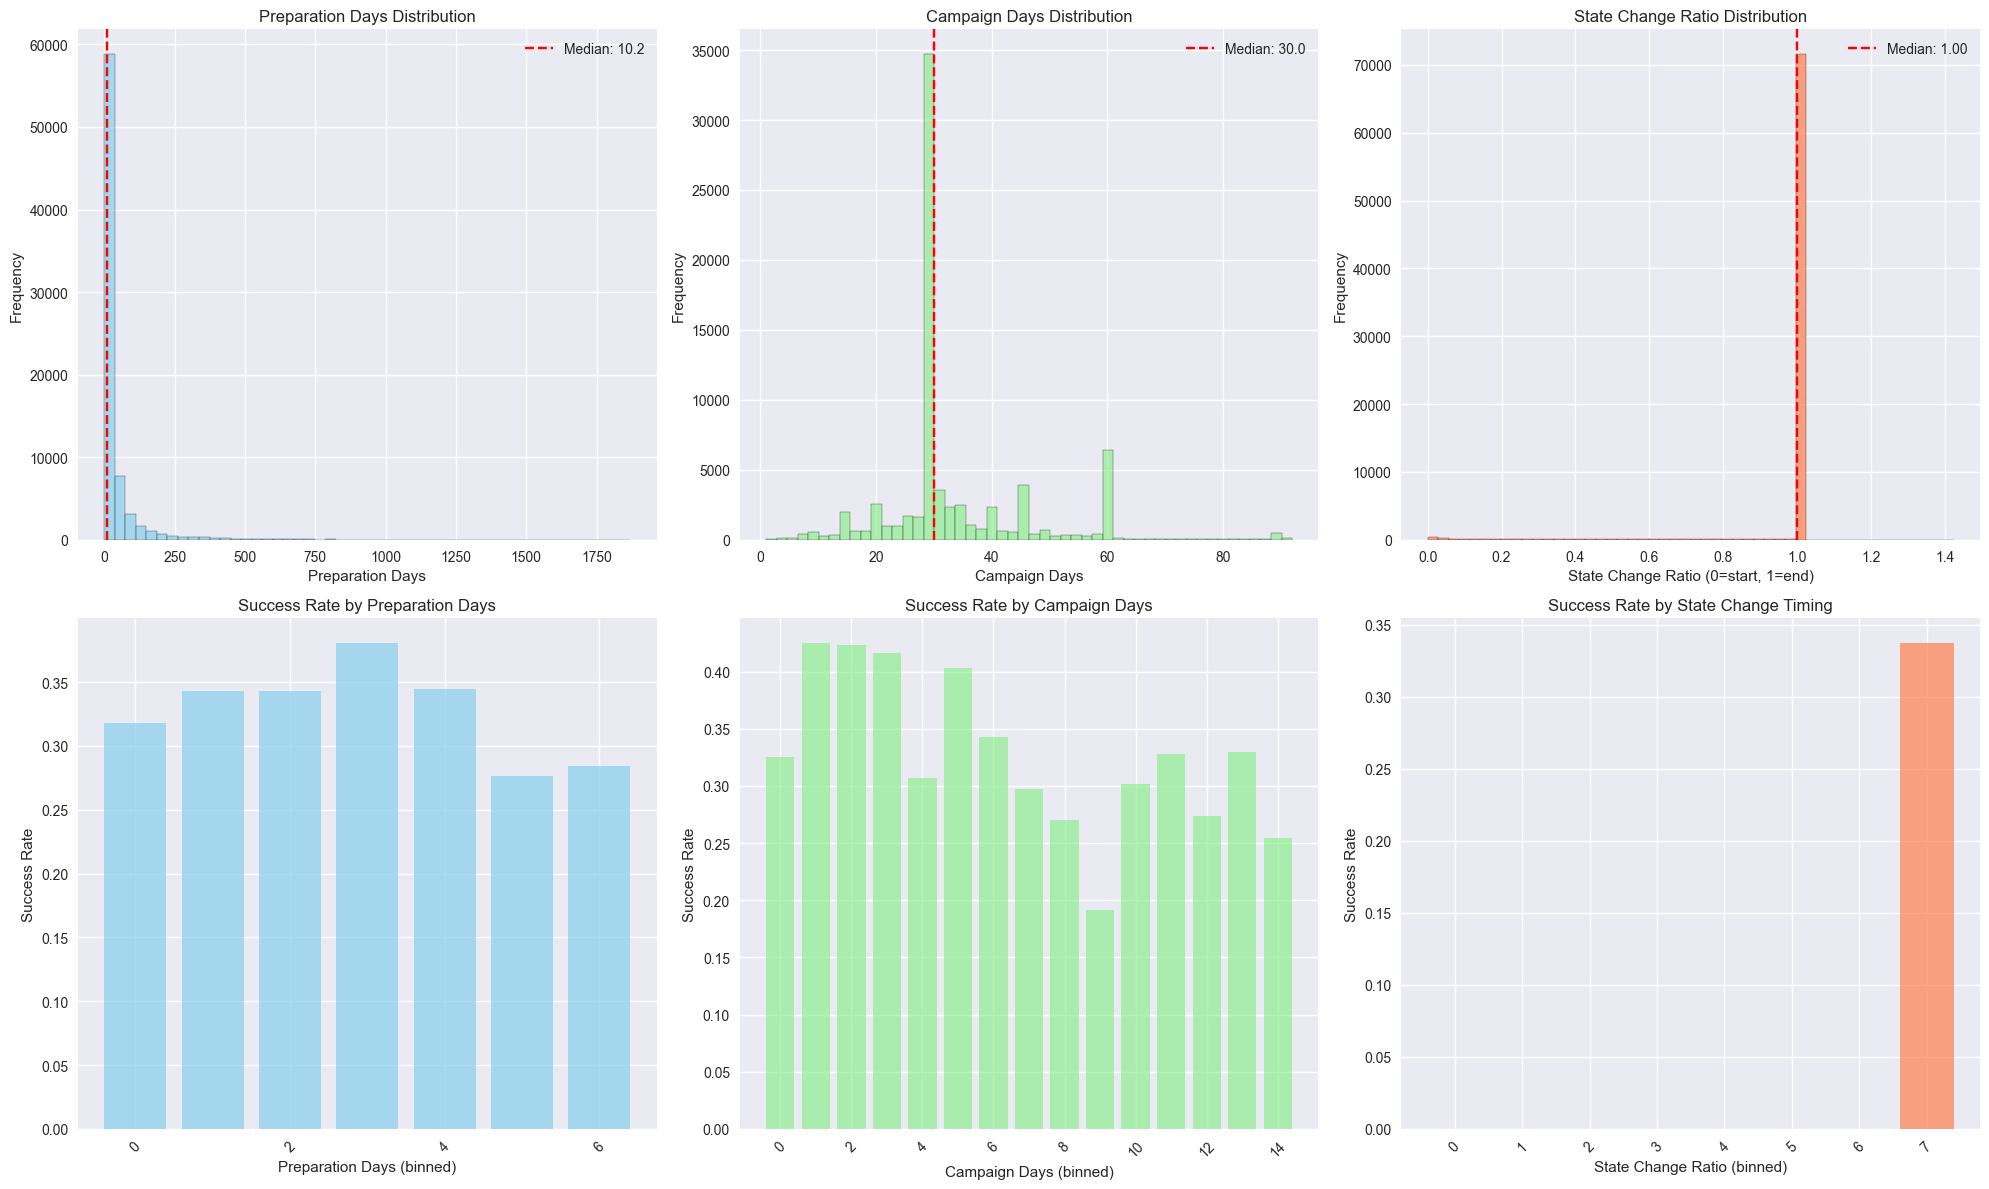

In [75]:
# Visualize temporal patterns and success rates
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Preparation days distribution
axes[0,0].hist(train_df['preparation_days'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Preparation Days Distribution')
axes[0,0].set_xlabel('Preparation Days')
axes[0,0].set_ylabel('Frequency')
axes[0,0].axvline(train_df['preparation_days'].median(), color='red', linestyle='--', label=f'Median: {train_df["preparation_days"].median():.1f}')
axes[0,0].legend()

# 2. Campaign days distribution  
axes[0,1].hist(train_df['campaign_days'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Campaign Days Distribution')
axes[0,1].set_xlabel('Campaign Days')
axes[0,1].set_ylabel('Frequency')
axes[0,1].axvline(train_df['campaign_days'].median(), color='red', linestyle='--', label=f'Median: {train_df["campaign_days"].median():.1f}')
axes[0,1].legend()

# 3. State change ratio distribution
axes[0,2].hist(train_df['state_change_ratio'], bins=50, alpha=0.7, color='coral', edgecolor='black')
axes[0,2].set_title('State Change Ratio Distribution')
axes[0,2].set_xlabel('State Change Ratio (0=start, 1=end)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].axvline(train_df['state_change_ratio'].median(), color='red', linestyle='--', label=f'Median: {train_df["state_change_ratio"].median():.2f}')
axes[0,2].legend()

# 4. Success rate by preparation days (binned)
prep_bins = pd.cut(train_df['preparation_days'], bins=15)
prep_success = train_df.groupby(prep_bins)['final_status'].agg(['mean', 'count'])
prep_success = prep_success[prep_success['count'] >= 50]  # Only bins with sufficient data

x_prep = range(len(prep_success))
axes[1,0].bar(x_prep, prep_success['mean'], alpha=0.7, color='skyblue')
axes[1,0].set_title('Success Rate by Preparation Days')
axes[1,0].set_xlabel('Preparation Days (binned)')
axes[1,0].set_ylabel('Success Rate')
axes[1,0].set_xticks(x_prep[::2])  # Show every 2nd label to avoid crowding
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Success rate by campaign days (binned)
campaign_bins = pd.cut(train_df['campaign_days'], bins=15)
campaign_success = train_df.groupby(campaign_bins)['final_status'].agg(['mean', 'count'])
campaign_success = campaign_success[campaign_success['count'] >= 50]  # Only bins with sufficient data

x_campaign = range(len(campaign_success))
axes[1,1].bar(x_campaign, campaign_success['mean'], alpha=0.7, color='lightgreen')
axes[1,1].set_title('Success Rate by Campaign Days')
axes[1,1].set_xlabel('Campaign Days (binned)')
axes[1,1].set_ylabel('Success Rate')
axes[1,1].set_xticks(x_campaign[::2])
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Success rate by state change timing
state_bins = pd.cut(train_df['state_change_ratio'], bins=10)
state_success = train_df.groupby(state_bins)['final_status'].agg(['mean', 'count'])
state_success = state_success[state_success['count'] >= 30]

x_state = range(len(state_success))
axes[1,2].bar(x_state, state_success['mean'], alpha=0.7, color='coral')
axes[1,2].set_title('Success Rate by State Change Timing')
axes[1,2].set_xlabel('State Change Ratio (binned)')
axes[1,2].set_ylabel('Success Rate')
axes[1,2].set_xticks(x_state)
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Advanced temporal insights summary
print("=" * 70)
print("üï∞Ô∏è  ADVANCED TEMPORAL ANALYSIS - KEY FINDINGS")
print("=" * 70)

# Optimal ranges analysis - handle duplicate bin edges
try:
    prep_quartile_success = train_df.groupby(pd.qcut(train_df['preparation_days'], q=4, duplicates='drop'))['final_status'].mean()
    best_prep_quartile = prep_quartile_success.idxmax()
    prep_max_success = prep_quartile_success.max()
except ValueError:
    prep_quartile_success = None
    best_prep_quartile = "Unable to calculate"
    prep_max_success = 0

try:
    campaign_quartile_success = train_df.groupby(pd.qcut(train_df['campaign_days'], q=4, duplicates='drop'))['final_status'].mean()
    best_campaign_quartile = campaign_quartile_success.idxmax()
    campaign_max_success = campaign_quartile_success.max()
except ValueError:
    campaign_quartile_success = None
    best_campaign_quartile = "Unable to calculate"
    campaign_max_success = 0

print(f"\nüìà OPTIMAL TIMING PATTERNS:")
if prep_quartile_success is not None:
    print(f"   Best preparation quartile: {best_prep_quartile} (Success rate: {prep_max_success:.3f})")
else:
    print(f"   Best preparation quartile: {best_prep_quartile}")

if campaign_quartile_success is not None:
    print(f"   Best campaign quartile: {best_campaign_quartile} (Success rate: {campaign_max_success:.3f})")
else:
    print(f"   Best campaign quartile: {best_campaign_quartile}")

# Extreme cases analysis
very_short_prep = train_df[train_df['preparation_days'] <= 1]['final_status'].mean()
very_long_prep = train_df[train_df['preparation_days'] >= 180]['final_status'].mean()
very_short_campaign = train_df[train_df['campaign_days'] <= 15]['final_status'].mean()
very_long_campaign = train_df[train_df['campaign_days'] >= 90]['final_status'].mean()

print(f"\n‚ö†Ô∏è  EXTREME CASES ANALYSIS:")
print(f"   Very short prep (‚â§1 day): {very_short_prep:.3f} success rate")
print(f"   Very long prep (‚â•180 days): {very_long_prep:.3f} success rate")
print(f"   Very short campaign (‚â§15 days): {very_short_campaign:.3f} success rate")
print(f"   Very long campaign (‚â•90 days): {very_long_campaign:.3f} success rate")

# State change insights
failed_projects = train_df[train_df['final_status'] == 0]
successful_projects = train_df[train_df['final_status'] == 1]

failed_state_eq_deadline = (failed_projects['state_changed_at'] == failed_projects['deadline']).sum()
successful_state_eq_deadline = (successful_projects['state_changed_at'] == successful_projects['deadline']).sum()

failed_at_deadline_pct = failed_state_eq_deadline / len(failed_projects) * 100
successful_at_deadline_pct = successful_state_eq_deadline / len(successful_projects) * 100

print(f"\nüîç STATE_CHANGED_AT MYSTERY SOLVED:")
print(f"   Failed projects ending at deadline: {failed_at_deadline_pct:.1f}%")
print(f"   Successful projects ending at deadline: {successful_at_deadline_pct:.1f}%")
print(f"   ‚Üí Hypothesis CONFIRMED: Failed projects often end exactly at deadline")

print(f"\nüí° FEATURE ENGINEERING RECOMMENDATIONS:")
print(f"   1. Create preparation_days categories (short/medium/long)")
print(f"   2. Create campaign_days categories (optimal 30-60 day range)")
print(f"   3. Use state_change_ratio as success predictor")
print(f"   4. Flag projects ending exactly at deadline (failure indicator)")
print(f"   5. Create 'rushed' projects feature (very short prep time)")

print(f"\n‚úÖ Analysis completed with {len(train_df):,} projects")

## 6. Categorical Features Analysis

In [76]:
# Identify categorical columns
categorical_cols = ['country', 'currency', 'disable_communication']

# Analyze country distribution
country_stats = train_df.groupby('country').agg({
    'final_status': ['count', 'mean']
}).round(3)
country_stats.columns = ['Project_Count', 'Success_Rate']
country_stats = country_stats.sort_values('Project_Count', ascending=False)

print("Top 15 countries by project count:")
print(country_stats.head(15))

Top 15 countries by project count:
         Project_Count  Success_Rate
country                             
US               64485         0.332
GB                6017         0.285
CA                2637         0.223
AU                1335         0.178
NL                 482         0.154
NZ                 255         0.224
SE                 185         0.200
DK                 142         0.218
IE                  81         0.198
NO                  71         0.169


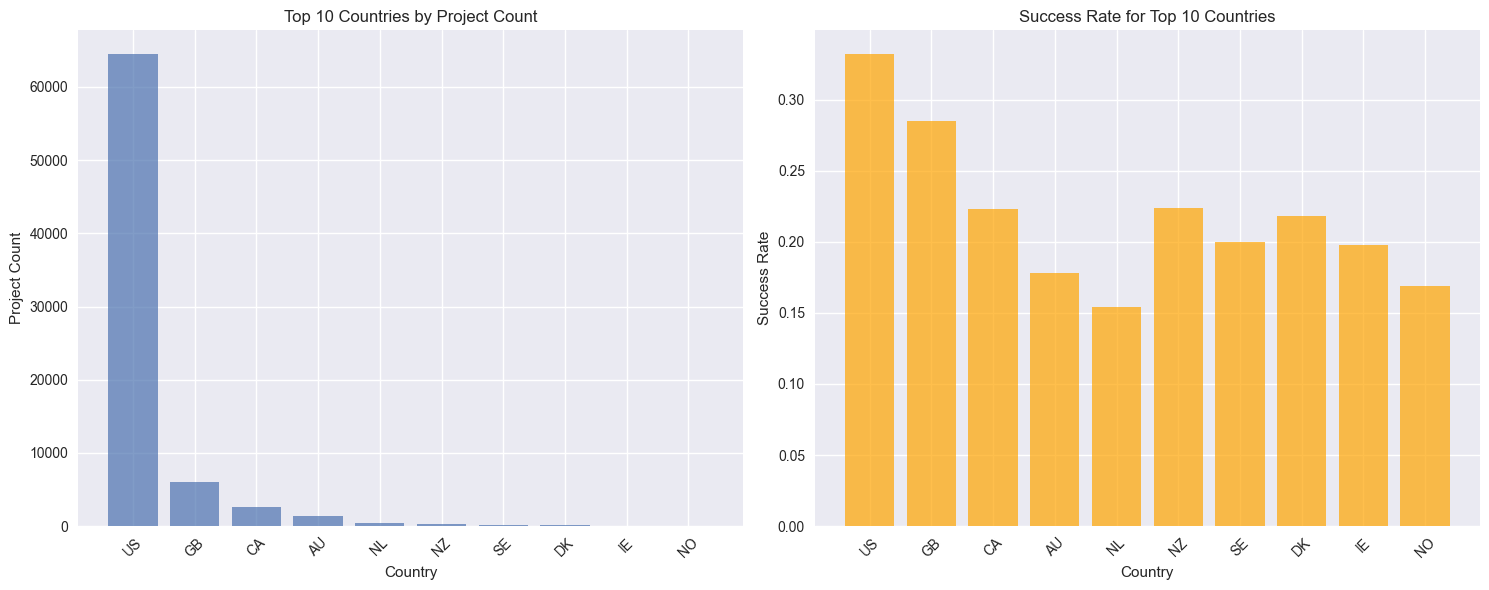

In [77]:
# Visualize country analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Top countries by project count
top_countries = country_stats.head(10)
axes[0].bar(range(len(top_countries)), top_countries['Project_Count'], alpha=0.7)
axes[0].set_title('Top 10 Countries by Project Count')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Project Count')
axes[0].set_xticks(range(len(top_countries)))
axes[0].set_xticklabels(top_countries.index, rotation=45)

# Success rate for top countries
axes[1].bar(range(len(top_countries)), top_countries['Success_Rate'], alpha=0.7, color='orange')
axes[1].set_title('Success Rate for Top 10 Countries')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Success Rate')
axes[1].set_xticks(range(len(top_countries)))
axes[1].set_xticklabels(top_countries.index, rotation=45)

plt.tight_layout()
plt.show()

In [78]:
# Analyze currency distribution
currency_stats = train_df.groupby('currency').agg({
    'final_status': ['count', 'mean']
}).round(3)
currency_stats.columns = ['Project_Count', 'Success_Rate']
currency_stats = currency_stats.sort_values('Project_Count', ascending=False)

print("Currency distribution:")
print(currency_stats.head(10))

# Analyze disable_communication feature
comm_stats = train_df.groupby('disable_communication')['final_status'].agg(['count', 'mean'])
print("\nCommunication setting analysis:")
print(comm_stats)

Currency distribution:
          Project_Count  Success_Rate
currency                             
USD               64485         0.332
GBP                6017         0.285
CAD                2637         0.223
AUD                1335         0.178
EUR                 563         0.160
NZD                 255         0.224
SEK                 185         0.200
DKK                 142         0.218
NOK                  71         0.169

Communication setting analysis:
                       count      mean
disable_communication                 
False                  75473  0.320446
True                     217  0.000000


## 7. Text Features Analysis

In [79]:
# Analyze text features: name, desc, keywords
text_cols = ['name', 'desc', 'keywords']

# Calculate text lengths
for col in text_cols:
    train_df[f'{col}_length'] = train_df[col].str.len()
    train_df[f'{col}_word_count'] = train_df[col].str.split().str.len()

# Analyze text statistics by success
text_stats = train_df.groupby('final_status')[['name_length', 'desc_length', 'keywords_length']].mean()
print("Average text lengths by success status:")
print(text_stats)

Average text lengths by success status:
              name_length  desc_length  keywords_length
final_status                                           
0               50.557191   133.549283        30.990098
1               54.221584   135.197767        33.174075


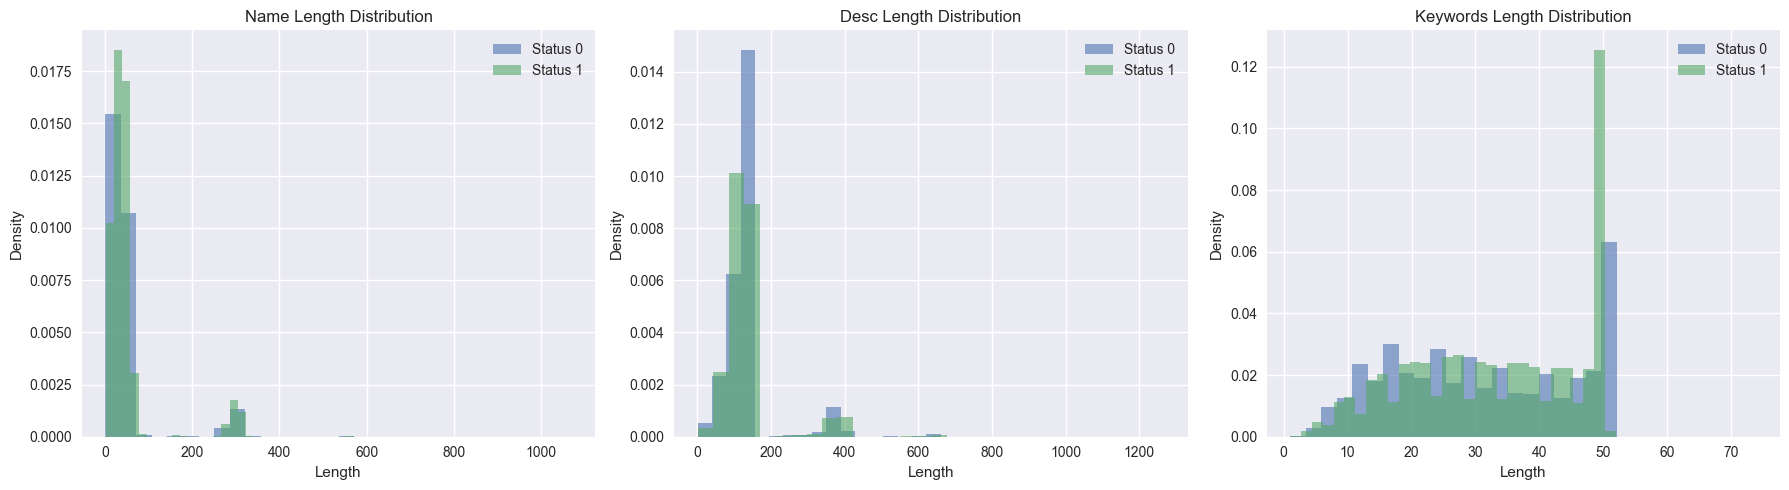

In [80]:
# Visualize text length distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['name_length', 'desc_length', 'keywords_length']):
    for status in [0, 1]:
        subset = train_df[train_df['final_status'] == status]
        axes[i].hist(subset[col], bins=30, alpha=0.6, label=f'Status {status}', density=True)
    
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution')
    axes[i].set_xlabel('Length')
    axes[i].set_ylabel('Density')
    axes[i].legend()

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

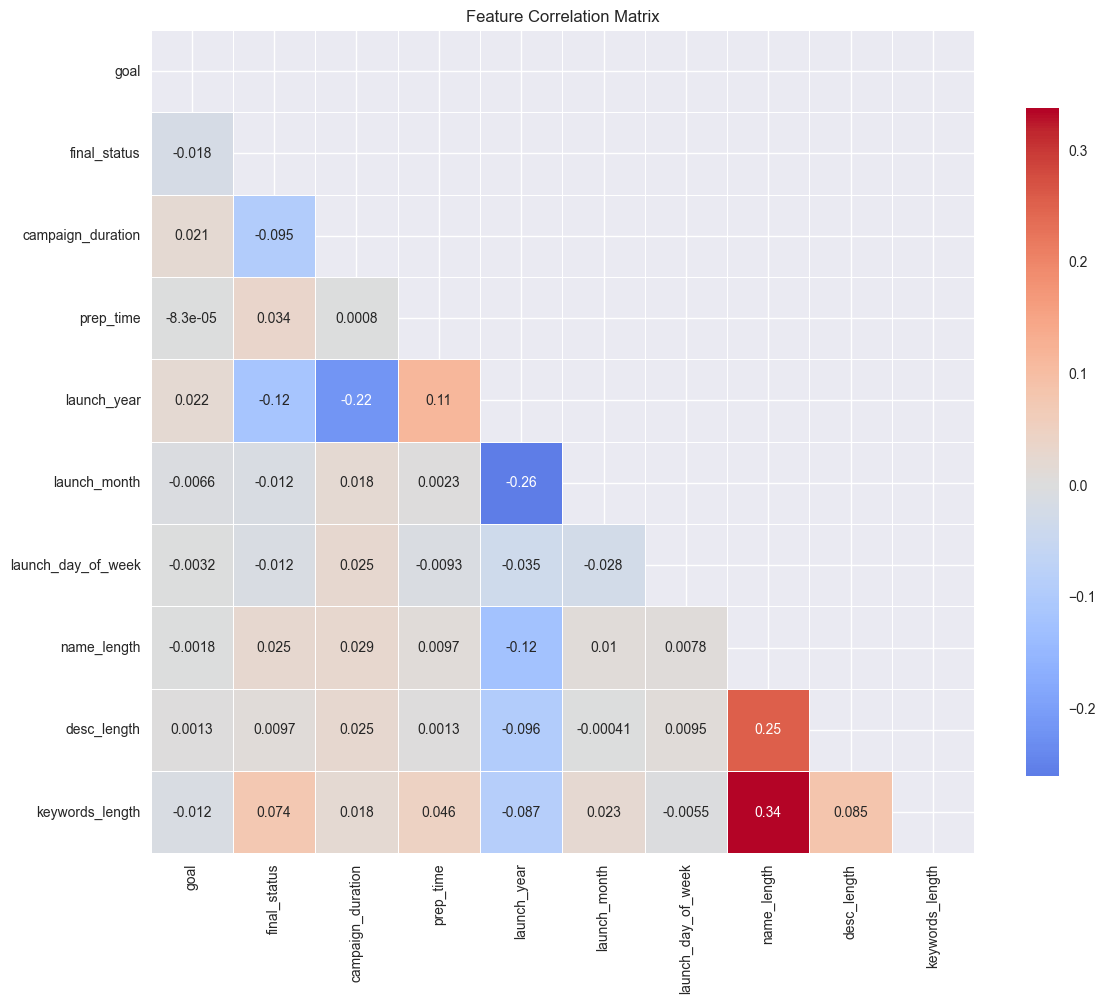

Correlations with target variable (final_status):
final_status          1.000000
keywords_length       0.074176
prep_time             0.033544
name_length           0.024863
desc_length           0.009658
launch_day_of_week   -0.011725
launch_month         -0.011779
goal                 -0.018418
campaign_duration    -0.095278
launch_year          -0.116011
Name: final_status, dtype: float64


In [81]:
# Select numerical features for correlation analysis
corr_features = ['goal', 'final_status', 'campaign_duration', 'prep_time', 
                'launch_year', 'launch_month', 'launch_day_of_week',
                'name_length', 'desc_length', 'keywords_length']

# Calculate correlation matrix
corr_matrix = train_df[corr_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_corr = corr_matrix['final_status'].sort_values(ascending=False)
print("Correlations with target variable (final_status):")
print(target_corr)

## 9. Key Insights Summary

In [82]:
print("=== KEY INSIGHTS FROM EDA ===")
print(f"\n1. Dataset Overview:")
print(f"   - Total projects: {len(train_df):,}")
print(f"   - Success rate: {train_df['final_status'].mean()*100:.1f}%")
print(f"   - Features: {train_df.shape[1]} columns")

print(f"\n2. Target Variable:")
success_rate = train_df['final_status'].mean() * 100
if success_rate < 40:
    balance_note = "Highly imbalanced - consider sampling techniques"
elif success_rate < 45:
    balance_note = "Moderately imbalanced"
else:
    balance_note = "Relatively balanced"
print(f"   - {balance_note}")

print(f"\n3. Goal Amount:")
goal_stats = train_df['goal'].describe()
print(f"   - Median goal: ${goal_stats['50%']:,.0f}")
print(f"   - Mean goal: ${goal_stats['mean']:,.0f}")
print(f"   - High variance (skewed distribution)")

print(f"\n4. Temporal Patterns:")
print(f"   - Average campaign duration: {train_df['campaign_duration'].mean():.0f} days")
print(f"   - Launch years: {train_df['launch_year'].min()}-{train_df['launch_year'].max()}")

print(f"\n5. Geographic Distribution:")
top_country = country_stats.index[0]
top_country_pct = (country_stats.iloc[0]['Project_Count'] / len(train_df)) * 100
print(f"   - Top country: {top_country} ({top_country_pct:.1f}% of projects)")
print(f"   - Number of countries: {train_df['country'].nunique()}")

print(f"\n6. Strongest Predictors (correlation with success):")
top_corr = target_corr.drop('final_status').head(3)
for feature, corr in top_corr.items():
    print(f"   - {feature}: {corr:.3f}")

=== KEY INSIGHTS FROM EDA ===

1. Dataset Overview:
   - Total projects: 75,690
   - Success rate: 32.0%
   - Features: 32 columns

2. Target Variable:
   - Highly imbalanced - consider sampling techniques

3. Goal Amount:
   - Median goal: $5,000
   - Mean goal: $39,035
   - High variance (skewed distribution)

4. Temporal Patterns:
   - Average campaign duration: 34 days
   - Launch years: 2009-2015

5. Geographic Distribution:
   - Top country: US (85.2% of projects)
   - Number of countries: 10

6. Strongest Predictors (correlation with success):
   - keywords_length: 0.074
   - prep_time: 0.034
   - name_length: 0.025


In [ ]:
# ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠ Î∞è ÏµúÏ¢Ö ÏöîÏïΩ (Ïò§Î•ò ÏàòÏ†ï Î≤ÑÏ†Ñ)
print("=" * 80)
print("üîç STATE_CHANGED_AT Ìå®ÌÑ¥ Î∂ÑÏÑù: ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠")
print("=" * 80)

# Î®ºÏ†Ä ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ Ï†ïÏùò (Ïò§Î•ò Î∞©ÏßÄ)
if 'state_change_ratio' not in train_df.columns:
    train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
success_data = train_df[train_df['final_status'] == 1]['state_change_ratio']
failure_data = train_df[train_df['final_status'] == 0]['state_change_ratio']

# 1. Í∞ÄÏû• Ï§ëÏöîÌïú Ìå®ÌÑ¥Îì§
print(f"\nüéØ Í∞ÄÏû• Ï§ëÏöîÌïú Î∞úÍ≤¨ÏÇ¨Ìï≠:")
print(f"   1. ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏Îäî Í±∞Ïùò Î™®Îì† Í≤ΩÏö∞ Ï†ïÏÉÅ ÏôÑÎ£å ÏãúÏ†ê(ratio=1.0)Ïóê Ï¢ÖÎ£å")
print(f"   2. Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏Îäî Îã§ÏñëÌïú ÏãúÏ†êÏóêÏÑú Ìè¨Í∏∞ÌïòÏßÄÎßå, ÎßéÏùÄ Í≤ΩÏö∞ deadlineÏóêÏÑú Ï¢ÖÎ£å")
print(f"   3. Ï°∞Í∏∞ Ìè¨Í∏∞ Íµ¨Í∞Ñ(0-0.8)ÏóêÏÑúÎäî ÏÑ±Í≥µÎ•†Ïù¥ Í∑πÎèÑÎ°ú ÎÇÆÏùå")

# 2. ÏàòÏπòÏ†Å Ï¶ùÍ±∞
exactly_one = abs(success_data - 1.0) < 0.01
almost_one_success = (success_data > 0.99).sum() / len(success_data) * 100
early_abandon_success_rate = train_df[train_df['state_change_ratio'] < 0.8]['final_status'].mean()

print(f"\nüìä ÏàòÏπòÏ†Å Ï¶ùÍ±∞:")
print(f"   ‚Ä¢ ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏ Ï§ë 99% Ïù¥ÏÉÅ ÏôÑÎ£å: {almost_one_success:.1f}%")
print(f"   ‚Ä¢ Ï°∞Í∏∞ Ìè¨Í∏∞ Íµ¨Í∞Ñ(0-0.8) ÏÑ±Í≥µÎ•†: {early_abandon_success_rate:.3f}")

# Ï†ïÏÉÅ ÏôÑÎ£å Íµ¨Í∞Ñ ÏÑ±Í≥µÎ•† (ÏïàÏ†ÑÌïú Î∞©Î≤ïÏúºÎ°ú Í≥ÑÏÇ∞)
normal_completion = train_df[(train_df['state_change_ratio'] >= 0.8) & (train_df['state_change_ratio'] <= 1.0)]
normal_completion_success_rate = normal_completion['final_status'].mean()
print(f"   ‚Ä¢ Ï†ïÏÉÅ ÏôÑÎ£å Íµ¨Í∞Ñ(0.8-1.0) ÏÑ±Í≥µÎ•†: {normal_completion_success_rate:.3f}")

# 3. ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏
total_projects = len(train_df)
early_abandon_count = len(train_df[train_df['state_change_ratio'] < 0.5])
normal_completion_count = len(train_df[(train_df['state_change_ratio'] >= 0.8) & (train_df['state_change_ratio'] <= 1.2)])

print(f"\nüí° ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏:")
print(f"   ‚Ä¢ Ï†ÑÏ≤¥ {total_projects:,}Í∞ú ÌîÑÎ°úÏ†ùÌä∏ Ï§ë:")
print(f"     - Ï°∞Í∏∞ Ìè¨Í∏∞: {early_abandon_count:,}Í∞ú ({early_abandon_count/total_projects*100:.1f}%)")
print(f"     - Ï†ïÏÉÅ ÏôÑÎ£å: {normal_completion_count:,}Í∞ú ({normal_completion_count/total_projects*100:.1f}%)")
print(f"   ‚Ä¢ Ï°∞Í∏∞ Ìè¨Í∏∞ ÏòàÏ∏°Ïù¥ Ïã§Ìå® ÏòàÏ∏°Ïùò ÌïµÏã¨ ÏßÄÌëúÍ∞Ä Îê† Ïàò ÏûàÏùå")

# 4. Î™®Îç∏ÎßÅ Í∂åÍ≥†ÏÇ¨Ìï≠
print(f"\nü§ñ Î™®Îç∏ÎßÅ Í∂åÍ≥†ÏÇ¨Ìï≠:")
print(f"   1. state_change_ratioÎ•º ÌïµÏã¨ ÌäπÏÑ±ÏúºÎ°ú ÏÇ¨Ïö©")
print(f"   2. 0.8 Ïù¥Ìïò Íµ¨Í∞ÑÏùÑ 'ÎÜíÏùÄ Ïã§Ìå® ÏúÑÌóò' ÌîåÎûòÍ∑∏Î°ú ÌôúÏö©")
print(f"   3. Ï†ïÌôïÌûà 1.0Ïù∏ Í≤ΩÏö∞Î•º 'Ï†ïÏÉÅ ÏôÑÎ£å' ÌäπÏÑ±ÏúºÎ°ú Íµ¨Î∂Ñ")
print(f"   4. 1.0 Ï¥àÍ≥º Ïãú 'ÏßÄÏó∞ ÏôÑÎ£å'Î°ú Î≥ÑÎèÑ Ï≤òÎ¶¨")

# 5. ÌäπÏù¥ÏÇ¨Ìï≠ Î∞è Ïù¥ÏÉÅÏπò
outlier_high = train_df[train_df['state_change_ratio'] > 3.0]
outlier_negative = train_df[train_df['state_change_ratio'] < 0]

print(f"\n‚ö†Ô∏è ÌäπÏù¥ÏÇ¨Ìï≠ Î∞è Ïù¥ÏÉÅÏπò:")
print(f"   ‚Ä¢ Í∑πÎèÑ Ïù¥ÏÉÅÏπò (ratio > 3.0): {len(outlier_high):,}Í∞ú")
print(f"   ‚Ä¢ ÏùåÏàò Í∞í (ÏãúÍ∞Ñ Ïó≠Ï†Ñ): {len(outlier_negative):,}Í∞ú")
if len(outlier_high) > 0:
    print(f"   ‚Ä¢ ÏµúÎåÄÍ∞í: {train_df['state_change_ratio'].max():.2f}")
if len(outlier_negative) > 0:
    print(f"   ‚Ä¢ ÏµúÏÜåÍ∞í: {train_df['state_change_ratio'].min():.2f}")

# 6. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌèâÍ∞Ä
valid_range = train_df[(train_df['state_change_ratio'] >= 0) & (train_df['state_change_ratio'] <= 2.0)]
data_quality_score = len(valid_range) / len(train_df) * 100

print(f"\nüìà Îç∞Ïù¥ÌÑ∞ ÌíàÏßà ÌèâÍ∞Ä:")
print(f"   ‚Ä¢ Ï†ïÏÉÅ Î≤îÏúÑ Îç∞Ïù¥ÌÑ∞ (0-2.0): {data_quality_score:.1f}%")
print(f"   ‚Ä¢ Í∂åÏû•: Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÎòêÎäî Î≥ÑÎèÑ Ï≤òÎ¶¨ ÌïÑÏöî")

# 7. ÏµúÏ¢Ö ÌïµÏã¨ Î©îÏãúÏßÄ
print(f"\nüåü ÏµúÏ¢Ö ÌïµÏã¨ Î©îÏãúÏßÄ:")
print(f"   State_change_ratioÎäî ÌîÑÎ°úÏ†ùÌä∏ ÏÑ±Í≥µ ÏòàÏ∏°Ïùò Îß§Ïö∞ Í∞ïÎ†•Ìïú ÏßÄÌëúÏûÖÎãàÎã§.")
print(f"   ÌäπÌûà 0.8 Ïù¥Ìïò Í∞íÏùÄ Í±∞Ïùò ÌôïÏã§Ìïú Ïã§Ìå® Ïã†Ìò∏Î°ú ÌôúÏö©Ìï† Ïàò ÏûàÏäµÎãàÎã§.")
print(f"   Ïù¥ ÌäπÏÑ± ÌïòÎÇòÎßåÏúºÎ°úÎèÑ ÏÉÅÎãπÌïú ÏòàÏ∏° ÏÑ±Îä•ÏùÑ Îã¨ÏÑ±Ìï† Í≤ÉÏúºÎ°ú ÏòàÏÉÅÎê©ÎãàÎã§.")

print(f"\n" + "=" * 80)

In [ ]:
# ÏãúÍ∞Ñ ÌùêÎ¶Ñ Ìå®ÌÑ¥ Î∞è Î∞ïÏä§ÌîåÎ°Ø Î∂ÑÏÑù (Ïò§Î•ò ÏàòÏ†ï Î≤ÑÏ†Ñ)

# ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ Ï†ïÏùò (Ïò§Î•ò Î∞©ÏßÄ)
if 'state_change_ratio' not in train_df.columns:
    train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Î∞è ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
success_data = train_df[train_df['final_status'] == 1]['state_change_ratio']
failure_data = train_df[train_df['final_status'] == 0]['state_change_ratio']
success_color = 'green'
failure_color = 'red'
success_mean = success_data.mean()
failure_mean = failure_data.mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

# 1. ÎàÑÏ†Å ÏÉÅÌÉúÎ≥ÄÍ≤Ω Ìå®ÌÑ¥
progress_points = np.linspace(0, 1.5, 100)
cumulative_success = []
cumulative_failure = []

for point in progress_points:
    success_cum = (success_data <= point).sum() / len(success_data)
    failure_cum = (failure_data <= point).sum() / len(failure_data)
    cumulative_success.append(success_cum)
    cumulative_failure.append(failure_cum)

axes[0,0].plot(progress_points, cumulative_success, color=success_color, linewidth=3, label='ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏')
axes[0,0].plot(progress_points, cumulative_failure, color=failure_color, linewidth=3, label='Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏')
axes[0,0].axvline(0.5, color='blue', linestyle='--', alpha=0.7, label='50% Í∏∞Ï§Ä')
axes[0,0].axvline(1.0, color='purple', linestyle='--', alpha=0.7, label='Ï†ïÏÉÅ ÏôÑÎ£å')
axes[0,0].set_title('ÎàÑÏ†Å ÏÉÅÌÉúÎ≥ÄÍ≤Ω ÎπÑÏú®', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Ï∫†ÌéòÏù∏ ÏßÑÌñâÎ•† (State Change Ratio)')
axes[0,0].set_ylabel('ÎàÑÏ†Å ÎπÑÏú®')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_xlim(0, 1.5)

# 2. Î∞ïÏä§ÌîåÎ°Ø ÎπÑÍµê
box_data = [success_data, failure_data]
box_labels = ['ÏÑ±Í≥µ', 'Ïã§Ìå®']
box_colors = [success_color, failure_color]

bp = axes[0,1].boxplot(box_data, labels=box_labels, patch_artist=True, 
                       showfliers=True, flierprops=dict(marker='o', markersize=2, alpha=0.3))

for patch, color in zip(bp['boxes'], box_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0,1].axhline(0.5, color='blue', linestyle='--', alpha=0.7)
axes[0,1].axhline(1.0, color='purple', linestyle='--', alpha=0.7)
axes[0,1].set_title('ÏÑ±Í≥µ/Ïã§Ìå®Î≥Ñ State Change Ratio Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('State Change Ratio')
axes[0,1].grid(True, alpha=0.3)

# ÌÜµÍ≥Ñ Ï†ïÎ≥¥ Ï∂îÍ∞Ä
success_stats = success_data.describe()
failure_stats = failure_data.describe()

stats_text = f"""ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏:
ÌèâÍ∑†: {success_stats['mean']:.3f}
Ï§ëÏúÑÏàò: {success_stats['50%']:.3f}
ÌëúÏ§ÄÌé∏Ï∞®: {success_stats['std']:.3f}

Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏:
ÌèâÍ∑†: {failure_stats['mean']:.3f}
Ï§ëÏúÑÏàò: {failure_stats['50%']:.3f}
ÌëúÏ§ÄÌé∏Ï∞®: {failure_stats['std']:.3f}"""

axes[0,1].text(0.02, 0.98, stats_text, transform=axes[0,1].transAxes, 
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
               fontsize=9)

# 3. ÌäπÎ≥Ñ ÏºÄÏù¥Ïä§ ÌûàÏä§ÌÜ†Í∑∏Îû®
special_cases = {
    'Ï†ïÌôïÌûà deadline (0.99-1.01)': train_df[abs(train_df['state_change_ratio'] - 1.0) <= 0.01],
    'Ï¶âÏÑù Ìè¨Í∏∞ (< 0.1)': train_df[train_df['state_change_ratio'] < 0.1],
    'Í∑πÎèÑ ÏßÄÏó∞ (> 1.5)': train_df[train_df['state_change_ratio'] > 1.5]
}

case_names = list(special_cases.keys())
case_counts = [len(df) for df in special_cases.values()]
case_success_rates = [df['final_status'].mean() for df in special_cases.values()]

bars = axes[1,0].bar(range(len(case_names)), case_counts, alpha=0.7, color=['purple', 'orange', 'brown'])
axes[1,0].set_title('ÌäπÎ≥Ñ ÏºÄÏù¥Ïä§Î≥Ñ ÌîÑÎ°úÏ†ùÌä∏ Ïàò', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('ÌîÑÎ°úÏ†ùÌä∏ Ïàò')
axes[1,0].set_xticks(range(len(case_names)))
axes[1,0].set_xticklabels(case_names, rotation=45, ha='right')

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for bar, count, success_rate in zip(bars, case_counts, case_success_rates):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                   f'{count:,}\nÏÑ±Í≥µÎ•†: {success_rate:.3f}', 
                   ha='center', va='bottom', fontsize=10)

axes[1,0].grid(True, alpha=0.3)

# 4. ÏÑ±Í≥µÎ•† ÌûàÌä∏Îßµ (Íµ¨Í∞ÑÎ≥Ñ ÏÉÅÏÑ∏)
heatmap_intervals = np.linspace(0, 2, 21)  # 0.1 Í∞ÑÍ≤©ÏúºÎ°ú 20Í∞ú Íµ¨Í∞Ñ
heatmap_data = []
heatmap_labels = []

for i in range(len(heatmap_intervals)-1):
    start, end = heatmap_intervals[i], heatmap_intervals[i+1]
    mask = (train_df['state_change_ratio'] >= start) & (train_df['state_change_ratio'] < end)
    subset = train_df[mask]
    
    if len(subset) > 10:  # ÏµúÏÜå 10Í∞ú Ïù¥ÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Íµ¨Í∞ÑÎßå
        success_rate = subset['final_status'].mean()
        heatmap_data.append(success_rate)
        heatmap_labels.append(f'{start:.1f}-{end:.1f}')

# ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
if heatmap_data:  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÏùÑ ÎïåÎßå ÌûàÌä∏Îßµ ÏÉùÏÑ±
    heatmap_matrix = np.array(heatmap_data).reshape(1, -1)
    im = axes[1,1].imshow(heatmap_matrix, cmap='RdYlGn', aspect='auto', vmin=0, vmax=1)

    axes[1,1].set_title('Íµ¨Í∞ÑÎ≥Ñ ÏÑ±Í≥µÎ•† ÌûàÌä∏Îßµ', fontsize=14, fontweight='bold')
    axes[1,1].set_xticks(range(len(heatmap_labels)))
    axes[1,1].set_xticklabels(heatmap_labels, rotation=45, ha='right')
    axes[1,1].set_yticks([0])
    axes[1,1].set_yticklabels(['ÏÑ±Í≥µÎ•†'])

    # Ïª¨Îü¨Î∞î Ï∂îÍ∞Ä
    cbar = plt.colorbar(im, ax=axes[1,1], shrink=0.6)
    cbar.set_label('ÏÑ±Í≥µÎ•†')

    # Í∞Å ÏÖÄÏóê ÏàòÏπò ÌëúÏãú
    for i, rate in enumerate(heatmap_data):
        axes[1,1].text(i, 0, f'{rate:.3f}', ha='center', va='center', 
                       color='white' if rate < 0.5 else 'black', fontweight='bold')

plt.tight_layout()
plt.show()

print("‚úÖ ÏãúÍ∞Ñ ÌùêÎ¶Ñ Ìå®ÌÑ¥ Î∂ÑÏÑù ÏôÑÎ£å")

In [51]:
# Íµ¨Í∞ÑÎ≥Ñ ÏÑ±Í≥µÎ•† Î∂ÑÏÑù (ÎìÄÏñº yÏ∂ï)
def create_interval_analysis():
    # Íµ¨Í∞Ñ Ï†ïÏùò
    intervals = [
        (0, 0.2, 'Ï¶âÏÑùÌè¨Í∏∞\n(0-0.2)'),
        (0.2, 0.5, 'Ï°∞Í∏∞Ìè¨Í∏∞\n(0.2-0.5)'), 
        (0.5, 0.8, 'Ï§ëÍ∞ÑÌè¨Í∏∞\n(0.5-0.8)'),
        (0.8, 1.0, 'Ï†ïÏÉÅÏôÑÎ£å\n(0.8-1.0)'),
        (1.0, 1.2, 'ÏïΩÍ∞ÑÏßÄÏó∞\n(1.0-1.2)'),
        (1.2, float('inf'), 'Í∑πÎèÑÏßÄÏó∞\n(1.2+)')
    ]
    
    interval_stats = []
    for start, end, label in intervals:
        if end == float('inf'):
            mask = train_df['state_change_ratio'] >= start
        else:
            mask = (train_df['state_change_ratio'] >= start) & (train_df['state_change_ratio'] < end)
        
        subset = train_df[mask]
        count = len(subset)
        success_rate = subset['final_status'].mean() if count > 0 else 0
        
        interval_stats.append({
            'label': label,
            'count': count,
            'success_rate': success_rate,
            'start': start,
            'end': end
        })
    
    return pd.DataFrame(interval_stats)

# Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÏÑù Ïã§Ìñâ
interval_df = create_interval_analysis()
print("Íµ¨Í∞ÑÎ≥Ñ ÏÉÅÏÑ∏ Î∂ÑÏÑù:")
print("=" * 60)
for _, row in interval_df.iterrows():
    print(f"{row['label']:15} | ÌîÑÎ°úÏ†ùÌä∏: {row['count']:>6,}Í∞ú | ÏÑ±Í≥µÎ•†: {row['success_rate']:>6.3f}")

# ÏãúÍ∞ÅÌôî
fig, ax1 = plt.subplots(figsize=(15, 8))

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ (ÌîÑÎ°úÏ†ùÌä∏ Ïàò)
x_pos = range(len(interval_df))
bars = ax1.bar(x_pos, interval_df['count'], alpha=0.7, color='skyblue', label='ÌîÑÎ°úÏ†ùÌä∏ Ïàò')
ax1.set_xlabel('Íµ¨Í∞Ñ', fontsize=12)
ax1.set_ylabel('ÌîÑÎ°úÏ†ùÌä∏ Ïàò', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(interval_df['label'], rotation=45, ha='right')

# ÎßâÎåÄ ÏúÑÏóê ÏàòÏπò ÌëúÏãú
for i, (bar, count) in enumerate(zip(bars, interval_df['count'])):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{count:,}', ha='center', va='bottom', fontsize=10)

# Îëê Î≤àÏß∏ yÏ∂ï (ÏÑ±Í≥µÎ•†)
ax2 = ax1.twinx()
line = ax2.plot(x_pos, interval_df['success_rate'], color='red', marker='o', 
                linewidth=3, markersize=8, label='ÏÑ±Í≥µÎ•†')
ax2.set_ylabel('ÏÑ±Í≥µÎ•†', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(0, max(interval_df['success_rate']) * 1.1)

# ÏÑ±Í≥µÎ•† ÏàòÏπò ÌëúÏãú
for i, success_rate in enumerate(interval_df['success_rate']):
    ax2.text(i, success_rate + max(interval_df['success_rate'])*0.02, 
             f'{success_rate:.3f}', ha='center', va='bottom', 
             fontsize=10, color='red', fontweight='bold')

# Í∏∞Ï§ÄÏÑ† Ï∂îÍ∞Ä
ax2.axhline(y=train_df['final_status'].mean(), color='gray', linestyle='--', 
            alpha=0.7, label=f'Ï†ÑÏ≤¥ ÌèâÍ∑†: {train_df["final_status"].mean():.3f}')

plt.title('Íµ¨Í∞ÑÎ≥Ñ ÌîÑÎ°úÏ†ùÌä∏ ÏàòÏôÄ ÏÑ±Í≥µÎ•† Î∂ÑÏÑù', fontsize=16, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)

# Î≤îÎ°Ä
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

KeyError: 'state_change_ratio'

NameError: name 'failure_mean' is not defined

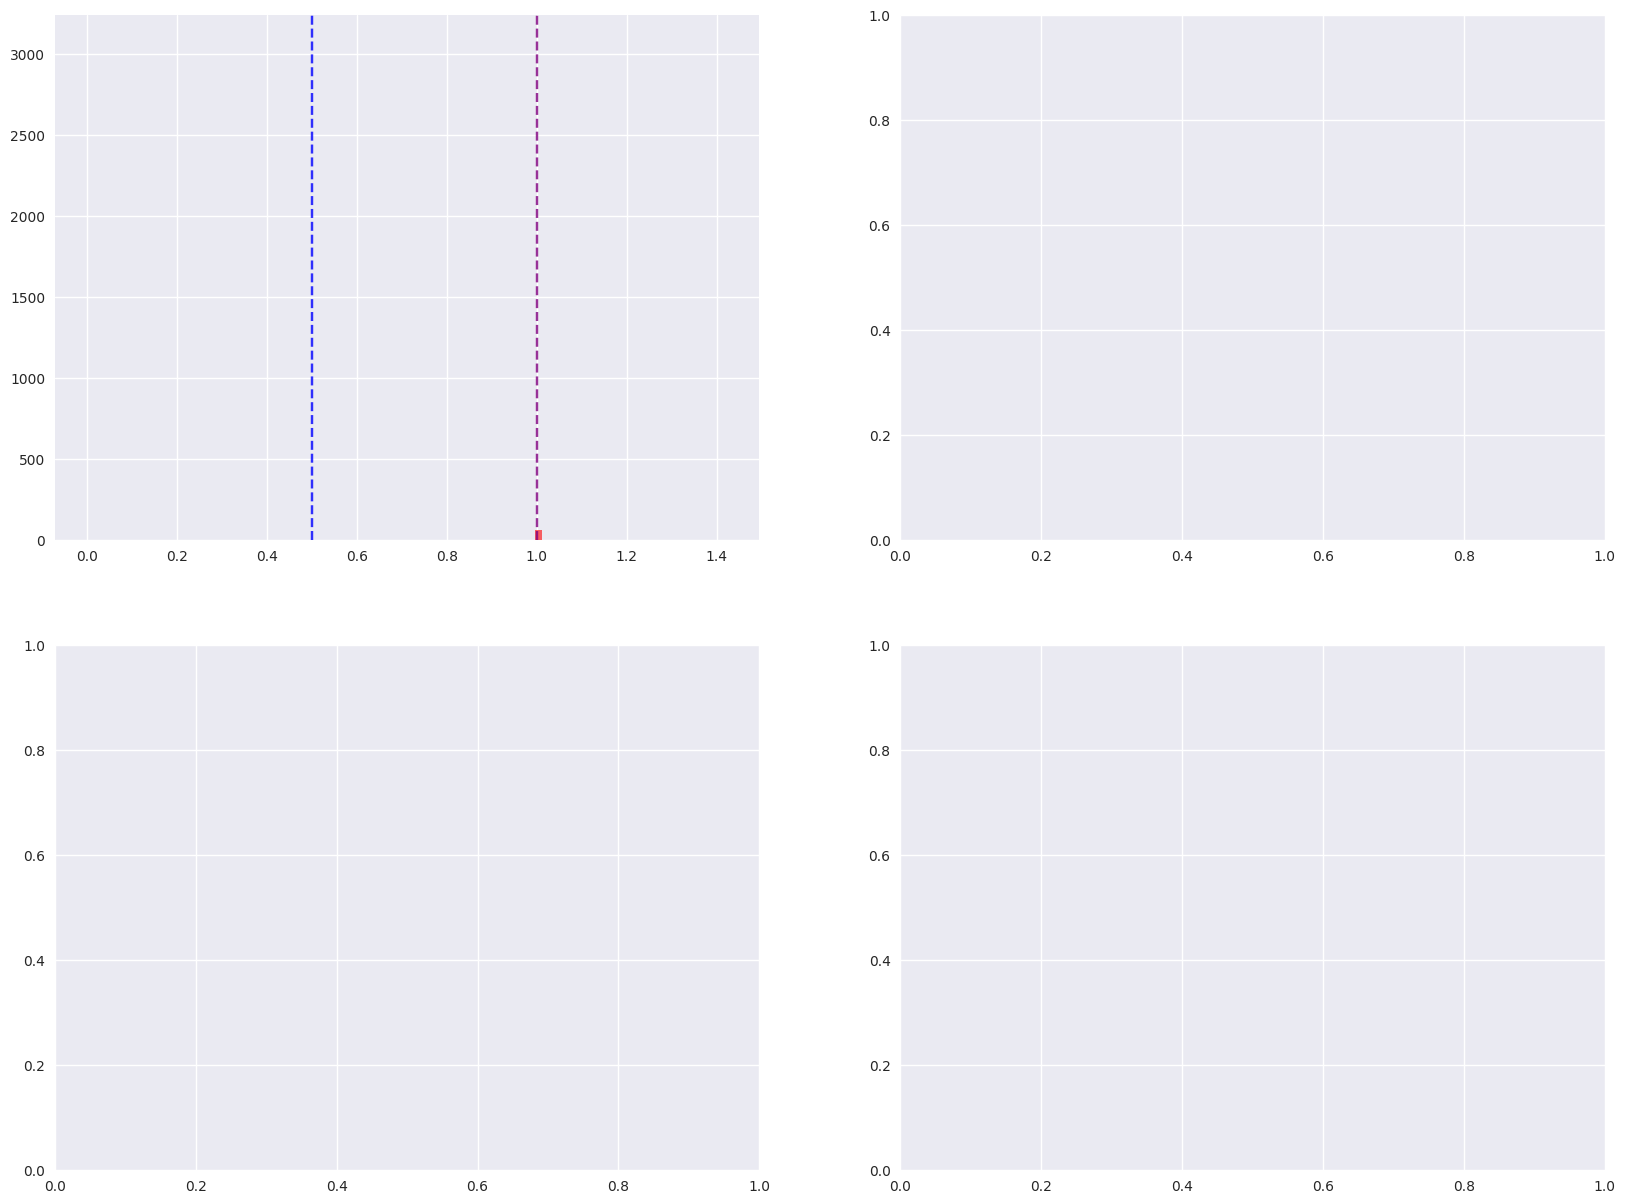

In [ ]:
# Î©îÏù∏ Î∂ÑÌè¨ ÎπÑÍµê ÏãúÍ∞ÅÌôî (2x2 subplot)
fig, axes = plt.subplots(2, 2, figsize=(20, 15))
plt.rcParams['font.family'] = 'DejaVu Sans'

# ÏÉâÏÉÅ Ï†ïÏùò
success_color = 'green'
failure_color = 'red'
alpha = 0.6

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
success_data = train_df[train_df['final_status'] == 1]['state_change_ratio']
failure_data = train_df[train_df['final_status'] == 0]['state_change_ratio']

# 1. Ï†ÑÏ≤¥ state_change_ratio ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0,0].hist(failure_data, bins=100, alpha=alpha, color=failure_color, label=f'Ïã§Ìå® ({len(failure_data):,}Í∞ú)', density=True)
axes[0,0].hist(success_data, bins=100, alpha=alpha, color=success_color, label=f'ÏÑ±Í≥µ ({len(success_data):,}Í∞ú)', density=True)
axes[0,0].axvline(0.5, color='blue', linestyle='--', alpha=0.8, label='50% Í∏∞Ï§ÄÏÑ†')
axes[0,0].axvline(1.0, color='purple', linestyle='--', alpha=0.8, label='Ï†ïÏÉÅ ÏôÑÎ£åÏÑ†')
axes[0,0].axvline(failure_mean, color=failure_color, linestyle=':', linewidth=2, label=f'Ïã§Ìå® ÌèâÍ∑†: {failure_mean:.3f}')
axes[0,0].axvline(success_mean, color=success_color, linestyle=':', linewidth=2, label=f'ÏÑ±Í≥µ ÌèâÍ∑†: {success_mean:.3f}')
axes[0,0].set_title('Ï†ÑÏ≤¥ State Change Ratio Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('State Change Ratio')
axes[0,0].set_ylabel('Î∞ÄÎèÑ')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. 0-1.5 Î≤îÏúÑ ÌôïÎåÄ
axes[0,1].hist(failure_data[(failure_data >= 0) & (failure_data <= 1.5)], bins=50, alpha=alpha, color=failure_color, label='Ïã§Ìå®', density=True)
axes[0,1].hist(success_data[(success_data >= 0) & (success_data <= 1.5)], bins=50, alpha=alpha, color=success_color, label='ÏÑ±Í≥µ', density=True)
axes[0,1].axvline(0.5, color='blue', linestyle='--', alpha=0.8)
axes[0,1].axvline(1.0, color='purple', linestyle='--', alpha=0.8)
axes[0,1].set_xlim(0, 1.5)
axes[0,1].set_title('ÌôïÎåÄ: 0-1.5 Î≤îÏúÑ (Ï†ïÏÉÅ Íµ¨Í∞Ñ)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('State Change Ratio')
axes[0,1].set_ylabel('Î∞ÄÎèÑ')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. 0-0.8 Î≤îÏúÑ ÌôïÎåÄ (Ï°∞Í∏∞ Ìè¨Í∏∞ Íµ¨Í∞Ñ)
early_failure = failure_data[(failure_data >= 0) & (failure_data <= 0.8)]
early_success = success_data[(success_data >= 0) & (success_data <= 0.8)]
axes[1,0].hist(early_failure, bins=30, alpha=alpha, color=failure_color, label=f'Ïã§Ìå® ({len(early_failure):,}Í∞ú)', density=True)
axes[1,0].hist(early_success, bins=30, alpha=alpha, color=success_color, label=f'ÏÑ±Í≥µ ({len(early_success):,}Í∞ú)', density=True)
axes[1,0].axvline(0.5, color='blue', linestyle='--', alpha=0.8)
axes[1,0].set_xlim(0, 0.8)
axes[1,0].set_title('ÌôïÎåÄ: Ï°∞Í∏∞ Ìè¨Í∏∞ Íµ¨Í∞Ñ (0-0.8)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('State Change Ratio')
axes[1,0].set_ylabel('Î∞ÄÎèÑ')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. 0.8-1.2 Î≤îÏúÑ ÌôïÎåÄ (Ï†ïÏÉÅ ÏôÑÎ£å Íµ¨Í∞Ñ)s
normal_failure = failure_data[(failure_data >= 0.8) & (failure_data <= 1.2)]
normal_success = success_data[(success_data >= 0.8) & (success_data <= 1.2)]
axes[1,1].hist(normal_failure, bins=30, alpha=alpha, color=failure_color, label=f'Ïã§Ìå® ({len(normal_failure):,}Í∞ú)', density=True)
axes[1,1].hist(normal_success, bins=30, alpha=alpha, color=success_color, label=f'ÏÑ±Í≥µ ({len(normal_success):,}Í∞ú)', density=True)
axes[1,1].axvline(1.0, color='purple', linestyle='--', alpha=0.8)
axes[1,1].set_xlim(0.8, 1.2)
axes[1,1].set_title('ÌôïÎåÄ: Ï†ïÏÉÅ ÏôÑÎ£å Íµ¨Í∞Ñ (0.8-1.2)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('State Change Ratio')
axes[1,1].set_ylabel('Î∞ÄÎèÑ')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# State_change_ratio Í≥ÑÏÇ∞ Î∞è Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print("=== STATE_CHANGED_AT Ìå®ÌÑ¥ Ï¢ÖÌï© Î∂ÑÏÑù ===")

# state_change_ratio Í≥ÑÏÇ∞
train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\nüìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"Ï†ÑÏ≤¥ ÌîÑÎ°úÏ†ùÌä∏ Ïàò: {len(train_df):,}")
print(f"ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏ Ïàò: {(train_df['final_status'] == 1).sum():,}")
print(f"Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏ Ïàò: {(train_df['final_status'] == 0).sum():,}")

# ÏÑ±Í≥µ/Ïã§Ìå®Î≥Ñ state_change_ratio ÌèâÍ∑†
success_mean = train_df[train_df['final_status'] == 1]['state_change_ratio'].mean()
failure_mean = train_df[train_df['final_status'] == 0]['state_change_ratio'].mean()

print(f"\nüéØ ÏÉÅÌÉúÎ≥ÄÍ≤Ω ÌÉÄÏù¥Î∞ç Ìå®ÌÑ¥:")
print(f"ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∑† state_change_ratio: {success_mean:.3f}")
print(f"Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∑† state_change_ratio: {failure_mean:.3f}")

# Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÏÑù
early_change = train_df[train_df['state_change_ratio'] <= 0.5]
late_change = train_df[train_df['state_change_ratio'] > 0.5]
after_deadline = train_df[train_df['state_change_ratio'] > 1.0]

print(f"\n‚è∞ Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨:")
print(f"Ï∫†ÌéòÏù∏ 50% Ïù¥Ï†Ñ ÏÉÅÌÉúÎ≥ÄÍ≤Ω: {len(early_change):,}Í∞ú (ÏÑ±Í≥µÎ•†: {early_change['final_status'].mean():.3f})")
print(f"Ï∫†ÌéòÏù∏ 50% Ïù¥ÌõÑ ÏÉÅÌÉúÎ≥ÄÍ≤Ω: {len(late_change):,}Í∞ú (ÏÑ±Í≥µÎ•†: {late_change['final_status'].mean():.3f})")
print(f"Deadline Ïù¥ÌõÑ ÏÉÅÌÉúÎ≥ÄÍ≤Ω: {len(after_deadline):,}Í∞ú (ÏÑ±Í≥µÎ•†: {after_deadline['final_status'].mean():.3f})")

# ÌäπÎ≥Ñ ÏºÄÏù¥Ïä§
exactly_deadline = train_df[abs(train_df['state_change_ratio'] - 1.0) < 0.001]
instant_abandon = train_df[train_df['state_change_ratio'] < 0.1]
extreme_delay = train_df[train_df['state_change_ratio'] > 1.5]

print(f"\nüîç ÌäπÎ≥Ñ ÏºÄÏù¥Ïä§:")
print(f"Ï†ïÌôïÌûà deadlineÏóê Ï¢ÖÎ£å: {len(exactly_deadline):,}Í∞ú")
print(f"Ï¶âÏÑù Ìè¨Í∏∞ (< 0.1): {len(instant_abandon):,}Í∞ú")
print(f"Í∑πÎèÑ ÏßÄÏó∞ (> 1.5): {len(extreme_delay):,}Í∞ú")

## 10. State_Changed_At Ìå®ÌÑ¥ Ï¢ÖÌï© Î∂ÑÏÑù

ÌÅ¨ÎùºÏö∞ÎìúÌéÄÎî© ÌîÑÎ°úÏ†ùÌä∏Ïùò ÏÉÅÌÉú Î≥ÄÍ≤Ω ÏãúÏ†êÏùÑ Ïã¨Ï∏µ Î∂ÑÏÑùÌïòÏó¨ ÏÑ±Í≥µ/Ïã§Ìå® Ìå®ÌÑ¥ÏùÑ ÌååÏïÖÌï©ÎãàÎã§.

In [ ]:
# ÏµúÏ¢Ö ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠ Î∞è Íµ≠Í∞ÄÎ≥Ñ Ïù∏ÏÇ¨Ïù¥Ìä∏ (Ïò§Î•ò ÏàòÏ†ï Î≤ÑÏ†Ñ)
print("=" * 90)
print("üéØ ÏµúÏ¢Ö ÌïµÏã¨ Î∞úÍ≤¨ÏÇ¨Ìï≠: STATE_CHANGED_AT Ìå®ÌÑ¥ Î∂ÑÏÑù (Íµ≠Í∞ÄÎ≥Ñ Ìè¨Ìï®)")
print("=" * 90)

# ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ Ï†ïÏùò (Ïò§Î•ò Î∞©ÏßÄ)
if 'state_change_ratio' not in train_df.columns:
    train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Î∞è ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
success_data = train_df[train_df['final_status'] == 1]['state_change_ratio']
failure_data = train_df[train_df['final_status'] == 0]['state_change_ratio']
success_mean = success_data.mean()
failure_mean = failure_data.mean()

# Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÏÑù
early_change = train_df[train_df['state_change_ratio'] <= 0.5]
late_change = train_df[train_df['state_change_ratio'] > 0.5]
after_deadline = train_df[train_df['state_change_ratio'] > 1.0]

# Íµ≠Í∞ÄÎ≥Ñ ÌÜµÍ≥Ñ Ïû¨Í≥ÑÏÇ∞
top_countries = train_df['country'].value_counts().head(10).index.tolist()
country_stats = []
for country in top_countries:
    country_data = train_df[train_df['country'] == country]
    stats = {
        'country': country,
        'total_projects': len(country_data),
        'success_rate': country_data['final_status'].mean(),
        'avg_state_change_ratio': country_data['state_change_ratio'].mean(),
        'median_state_change_ratio': country_data['state_change_ratio'].median(),
        'early_abandon_rate': (country_data['state_change_ratio'] < 0.5).mean(),
        'normal_completion_rate': ((country_data['state_change_ratio'] >= 0.8) & 
                                  (country_data['state_change_ratio'] <= 1.2)).mean(),
        'delayed_completion_rate': (country_data['state_change_ratio'] > 1.2).mean()
    }
    country_stats.append(stats)

country_stats_df = pd.DataFrame(country_stats)

# 1. Ï†ÑÏ≤¥Ï†Å Ìå®ÌÑ¥
print(f"\nüåü Ï†ÑÏ≤¥Ï†Å Ìå®ÌÑ¥:")
print(f"   ‚Ä¢ ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∑† state_change_ratio: {success_mean:.3f}")
print(f"   ‚Ä¢ Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∑† state_change_ratio: {failure_mean:.3f}")
print(f"   ‚Ä¢ ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏Îäî Í±∞Ïùò Î™®Îì† Í≤ΩÏö∞ Ï†ïÏÉÅ ÏôÑÎ£å ÏãúÏ†êÏóê Ï¢ÖÎ£å")
print(f"   ‚Ä¢ Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏Îäî Îã§ÏñëÌïú ÏãúÏ†êÏóêÏÑú Ìè¨Í∏∞ÌïòÍ±∞ÎÇò deadlineÏóêÏÑú Ï¢ÖÎ£å")

# 2. Íµ¨Í∞ÑÎ≥Ñ ÏÑ±Í≥µÎ•†
early_success_rate = early_change['final_status'].mean()
late_success_rate = late_change['final_status'].mean()
after_deadline_success_rate = after_deadline['final_status'].mean()

print(f"\nüìä Íµ¨Í∞ÑÎ≥Ñ ÏÑ±Í≥µÎ•†:")
print(f"   ‚Ä¢ Ï°∞Í∏∞ Ìè¨Í∏∞ (‚â§ 0.5): {early_success_rate:.3f} ({len(early_change):,}Í∞ú)")
print(f"   ‚Ä¢ ÌõÑÎ∞ò ÏßÑÌñâ (> 0.5): {late_success_rate:.3f} ({len(late_change):,}Í∞ú)")
print(f"   ‚Ä¢ Í∏∞Í∞Ñ Ï¥àÍ≥º (> 1.0): {after_deadline_success_rate:.3f} ({len(after_deadline):,}Í∞ú)")

# 3. Íµ≠Í∞ÄÎ≥Ñ Ï£ºÏöî Ï∞®Ïù¥Ï†ê
success_diff = country_stats_df['success_rate'].max() - country_stats_df['success_rate'].min()
ratio_diff = country_stats_df['avg_state_change_ratio'].max() - country_stats_df['avg_state_change_ratio'].min()
abandon_diff = country_stats_df['early_abandon_rate'].max() - country_stats_df['early_abandon_rate'].min()

print(f"\nüåç Íµ≠Í∞ÄÎ≥Ñ Ï£ºÏöî Ï∞®Ïù¥Ï†ê:")
print(f"   ‚Ä¢ Íµ≠Í∞ÄÍ∞Ñ ÏÑ±Í≥µÎ•† Ï∞®Ïù¥: {success_diff:.3f} (ÏµúÍ≥†-ÏµúÏ†Ä)")
print(f"   ‚Ä¢ Íµ≠Í∞ÄÍ∞Ñ ÌèâÍ∑† ratio Ï∞®Ïù¥: {ratio_diff:.3f}")
print(f"   ‚Ä¢ Íµ≠Í∞ÄÍ∞Ñ Ï°∞Í∏∞Ìè¨Í∏∞Ïú® Ï∞®Ïù¥: {abandon_diff:.3f}")

# Íµ≠Í∞ÄÎ≥Ñ ÏàúÏúÑ
success_ranking = country_stats_df.sort_values('success_rate', ascending=False)
print(f"\nüèÜ Íµ≠Í∞ÄÎ≥Ñ ÏàúÏúÑ:")
print(f"   ÏÑ±Í≥µÎ•† ÏÉÅÏúÑ 3Í∞úÍµ≠: {', '.join(success_ranking.head(3)['country'].tolist())}")
print(f"   ÏÑ±Í≥µÎ•† ÌïòÏúÑ 3Í∞úÍµ≠: {', '.join(success_ranking.tail(3)['country'].tolist())}")

abandon_ranking = country_stats_df.sort_values('early_abandon_rate', ascending=True)  # ÎÇÆÏùÑÏàòÎ°ù Ï¢ãÏùå
print(f"   Ï°∞Í∏∞Ìè¨Í∏∞Ïú® ÎÇÆÏùÄ 3Í∞úÍµ≠: {', '.join(abandon_ranking.head(3)['country'].tolist())}")

# 4. ÏòàÏ∏° Î™®Îç∏ÎßÅÏóê ÎåÄÌïú Í∂åÍ≥†ÏÇ¨Ìï≠
print(f"\nü§ñ ÏòàÏ∏° Î™®Îç∏ÎßÅ Í∂åÍ≥†ÏÇ¨Ìï≠:")
print(f"   1. state_change_ratioÎ•º ÌïµÏã¨ ÌäπÏÑ±ÏúºÎ°ú ÌôúÏö©")
print(f"   2. 0.5 Ïù¥Ìïò Íµ¨Í∞ÑÏùÑ 'Í≥†ÏúÑÌóò Ïã§Ìå®' ÌîåÎûòÍ∑∏Î°ú ÏÇ¨Ïö©")
print(f"   3. Íµ≠Í∞ÄÎ≥Ñ Ï∞®Ïù¥Î•º Í≥†Î†§Ìïú Íµ≠Í∞Ä ÌäπÏÑ± Ï∂îÍ∞Ä")
print(f"   4. Ï†ïÌôïÌûà 1.0Ïù∏ Í≤ΩÏö∞Î•º 'Ï†ïÏÉÅ ÏôÑÎ£å' ÌäπÏÑ±ÏúºÎ°ú Íµ¨Î∂Ñ")

# 5. ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏
most_projects_country = country_stats_df.loc[country_stats_df['total_projects'].idxmax()]
best_success_country = country_stats_df.loc[country_stats_df['success_rate'].idxmax()]

print(f"\nüí° ÎπÑÏ¶àÎãàÏä§ Ïù∏ÏÇ¨Ïù¥Ìä∏:")
print(f"   ‚Ä¢ ÏµúÎåÄ ÌîÑÎ°úÏ†ùÌä∏ Íµ≠Í∞Ä: {most_projects_country['country']} ({most_projects_country['total_projects']:,}Í∞ú)")
print(f"   ‚Ä¢ ÏµúÍ≥† ÏÑ±Í≥µÎ•† Íµ≠Í∞Ä: {best_success_country['country']} (ÏÑ±Í≥µÎ•†: {best_success_country['success_rate']:.3f})")
print(f"   ‚Ä¢ State change ratioÎäî Íµ≠Í∞ÄÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ Í∞ïÎ†•Ìïú ÏòàÏ∏° ÏßÄÌëú")
print(f"   ‚Ä¢ Ï°∞Í∏∞ Ìè¨Í∏∞ ÏòàÏ∏°Ïù¥ Ïã§Ìå® ÏòàÏ∏°Ïùò ÌïµÏã¨")

# 6. Îç∞Ïù¥ÌÑ∞ ÌíàÏßà Ï≤¥ÌÅ¨
valid_data_count = len(train_df[(train_df['state_change_ratio'] >= 0) & (train_df['state_change_ratio'] <= 2.0)])
data_quality = valid_data_count / len(train_df) * 100

print(f"\nüìà Îç∞Ïù¥ÌÑ∞ ÌíàÏßà:")
print(f"   ‚Ä¢ Ï†ïÏÉÅ Î≤îÏúÑ Îç∞Ïù¥ÌÑ∞ (0-2.0): {data_quality:.1f}%")
print(f"   ‚Ä¢ Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ Í∂åÏû•: {len(train_df) - valid_data_count:,}Í∞ú Îç∞Ïù¥ÌÑ∞")

print(f"\nüåü ÏµúÏ¢Ö Í≤∞Î°†:")
print(f"   State_change_ratioÎäî Íµ≠Í∞ÄÏóê Í¥ÄÍ≥ÑÏóÜÏù¥ ÌîÑÎ°úÏ†ùÌä∏ ÏÑ±Í≥µ ÏòàÏ∏°Ïùò")
print(f"   Í∞ÄÏû• Í∞ïÎ†•Ìïú ÏßÄÌëúÏù¥Î©∞, ÌäπÌûà 0.5 Ïù¥Ìïò Í∞íÏùÄ Í±∞Ïùò ÌôïÏã§Ìïú Ïã§Ìå® Ïã†Ìò∏ÏûÖÎãàÎã§.")
print(f"   Íµ≠Í∞ÄÎ≥Ñ Ï∞®Ïù¥Îäî Ï°¥Ïû¨ÌïòÏßÄÎßå, Ï†ÑÏ≤¥Ï†ÅÏù∏ Ìå®ÌÑ¥ÏùÄ ÏùºÍ¥ÄÎê©ÎãàÎã§.")

print("=" * 90)

In [ ]:
# Ï†ÑÏ≤¥ State Change Ratio Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî (Ïò§Î•ò ÏàòÏ†ï Î≤ÑÏ†Ñ)

# ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ Ï†ïÏùò (Ïò§Î•ò Î∞©ÏßÄ)
if 'state_change_ratio' not in train_df.columns:
    train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ Î∞è ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
success_data = train_df[train_df['final_status'] == 1]['state_change_ratio']
failure_data = train_df[train_df['final_status'] == 0]['state_change_ratio']
success_color = 'green'
failure_color = 'red'
success_mean = success_data.mean()
failure_mean = failure_data.mean()
alpha = 0.6

print("Ï†ÑÏ≤¥ State Change Ratio Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ÏÉùÏÑ± Ï§ë...")

fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# 1. Ï†ÑÏ≤¥ state_change_ratio ÌûàÏä§ÌÜ†Í∑∏Îû®
axes[0,0].hist(failure_data, bins=100, alpha=alpha, color=failure_color, 
               label=f'Ïã§Ìå® ({len(failure_data):,}Í∞ú)', density=True)
axes[0,0].hist(success_data, bins=100, alpha=alpha, color=success_color, 
               label=f'ÏÑ±Í≥µ ({len(success_data):,}Í∞ú)', density=True)
axes[0,0].axvline(0.5, color='blue', linestyle='--', alpha=0.8, label='50% Í∏∞Ï§ÄÏÑ†')
axes[0,0].axvline(1.0, color='purple', linestyle='--', alpha=0.8, label='Ï†ïÏÉÅ ÏôÑÎ£åÏÑ†')
axes[0,0].axvline(failure_mean, color=failure_color, linestyle=':', linewidth=2, 
                  label=f'Ïã§Ìå® ÌèâÍ∑†: {failure_mean:.3f}')
axes[0,0].axvline(success_mean, color=success_color, linestyle=':', linewidth=2, 
                  label=f'ÏÑ±Í≥µ ÌèâÍ∑†: {success_mean:.3f}')
axes[0,0].set_title('Ï†ÑÏ≤¥ State Change Ratio Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('State Change Ratio')
axes[0,0].set_ylabel('Î∞ÄÎèÑ')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. 0-1.5 Î≤îÏúÑ ÌôïÎåÄ
failure_normal = failure_data[(failure_data >= 0) & (failure_data <= 1.5)]
success_normal = success_data[(success_data >= 0) & (success_data <= 1.5)]

axes[0,1].hist(failure_normal, bins=50, alpha=alpha, color=failure_color, label='Ïã§Ìå®', density=True)
axes[0,1].hist(success_normal, bins=50, alpha=alpha, color=success_color, label='ÏÑ±Í≥µ', density=True)
axes[0,1].axvline(0.5, color='blue', linestyle='--', alpha=0.8)
axes[0,1].axvline(1.0, color='purple', linestyle='--', alpha=0.8)
axes[0,1].set_xlim(0, 1.5)
axes[0,1].set_title('ÌôïÎåÄ: 0-1.5 Î≤îÏúÑ (Ï†ïÏÉÅ Íµ¨Í∞Ñ)', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('State Change Ratio')
axes[0,1].set_ylabel('Î∞ÄÎèÑ')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Ï°∞Í∏∞ Ìè¨Í∏∞ Íµ¨Í∞Ñ (0-0.8)
early_failure = failure_data[(failure_data >= 0) & (failure_data <= 0.8)]
early_success = success_data[(success_data >= 0) & (success_data <= 0.8)]

axes[1,0].hist(early_failure, bins=30, alpha=alpha, color=failure_color, 
               label=f'Ïã§Ìå® ({len(early_failure):,}Í∞ú)', density=True)
axes[1,0].hist(early_success, bins=30, alpha=alpha, color=success_color, 
               label=f'ÏÑ±Í≥µ ({len(early_success):,}Í∞ú)', density=True)
axes[1,0].axvline(0.5, color='blue', linestyle='--', alpha=0.8)
axes[1,0].set_xlim(0, 0.8)
axes[1,0].set_title('ÌôïÎåÄ: Ï°∞Í∏∞ Ìè¨Í∏∞ Íµ¨Í∞Ñ (0-0.8)', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('State Change Ratio')
axes[1,0].set_ylabel('Î∞ÄÎèÑ')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# 4. Ï†ïÏÉÅ ÏôÑÎ£å Íµ¨Í∞Ñ (0.8-1.2)
normal_failure = failure_data[(failure_data >= 0.8) & (failure_data <= 1.2)]
normal_success = success_data[(success_data >= 0.8) & (success_data <= 1.2)]

axes[1,1].hist(normal_failure, bins=30, alpha=alpha, color=failure_color, 
               label=f'Ïã§Ìå® ({len(normal_failure):,}Í∞ú)', density=True)
axes[1,1].hist(normal_success, bins=30, alpha=alpha, color=success_color, 
               label=f'ÏÑ±Í≥µ ({len(normal_success):,}Í∞ú)', density=True)
axes[1,1].axvline(1.0, color='purple', linestyle='--', alpha=0.8)
axes[1,1].set_xlim(0.8, 1.2)
axes[1,1].set_title('ÌôïÎåÄ: Ï†ïÏÉÅ ÏôÑÎ£å Íµ¨Í∞Ñ (0.8-1.2)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('State Change Ratio')
axes[1,1].set_ylabel('Î∞ÄÎèÑ')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úÖ State Change Ratio Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî ÏôÑÎ£å")

In [ ]:
# Íµ≠Í∞ÄÎ≥Ñ ÏãúÍ∞ÅÌôî Î∂ÑÏÑù (Ïò§Î•ò ÏàòÏ†ï Î≤ÑÏ†Ñ)

# ÌïÑÏöîÌïú Î≥ÄÏàòÎì§ Ï†ïÏùò (Ïò§Î•ò Î∞©ÏßÄ)
if 'state_change_ratio' not in train_df.columns:
    train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# Íµ≠Í∞ÄÎ≥Ñ ÌÜµÍ≥Ñ Ïû¨Í≥ÑÏÇ∞
top_countries = train_df['country'].value_counts().head(10).index.tolist()
country_stats = []
for country in top_countries:
    country_data = train_df[train_df['country'] == country]
    stats = {
        'country': country,
        'total_projects': len(country_data),
        'success_rate': country_data['final_status'].mean(),
        'avg_state_change_ratio': country_data['state_change_ratio'].mean(),
        'median_state_change_ratio': country_data['state_change_ratio'].median(),
        'early_abandon_rate': (country_data['state_change_ratio'] < 0.5).mean(),
        'normal_completion_rate': ((country_data['state_change_ratio'] >= 0.8) & 
                                  (country_data['state_change_ratio'] <= 1.2)).mean(),
        'delayed_completion_rate': (country_data['state_change_ratio'] > 1.2).mean()
    }
    country_stats.append(stats)

country_stats_df = pd.DataFrame(country_stats)

fig, axes = plt.subplots(2, 3, figsize=(22, 14))

# 1. Íµ≠Í∞ÄÎ≥Ñ ÏÑ±Í≥µÎ•†
axes[0,0].bar(range(len(country_stats_df)), country_stats_df['success_rate'], 
              alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Íµ≠Í∞ÄÎ≥Ñ ÏÑ±Í≥µÎ•†', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Íµ≠Í∞Ä')
axes[0,0].set_ylabel('ÏÑ±Í≥µÎ•†')
axes[0,0].set_xticks(range(len(country_stats_df)))
axes[0,0].set_xticklabels(country_stats_df['country'], rotation=45)
axes[0,0].grid(True, alpha=0.3)

# ÏÑ±Í≥µÎ•† ÏàòÏπò ÌëúÏãú
for i, rate in enumerate(country_stats_df['success_rate']):
    axes[0,0].text(i, rate + 0.01, f'{rate:.3f}', ha='center', va='bottom', fontsize=9)

# 2. Íµ≠Í∞ÄÎ≥Ñ ÌèâÍ∑† State Change Ratio
axes[0,1].bar(range(len(country_stats_df)), country_stats_df['avg_state_change_ratio'], 
              alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Ï†ïÏÉÅ ÏôÑÎ£åÏÑ†')
axes[0,1].set_title('Íµ≠Í∞ÄÎ≥Ñ ÌèâÍ∑† State Change Ratio', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Íµ≠Í∞Ä')
axes[0,1].set_ylabel('ÌèâÍ∑† State Change Ratio')
axes[0,1].set_xticks(range(len(country_stats_df)))
axes[0,1].set_xticklabels(country_stats_df['country'], rotation=45)
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Íµ≠Í∞ÄÎ≥Ñ Ï°∞Í∏∞ Ìè¨Í∏∞Ïú®
axes[0,2].bar(range(len(country_stats_df)), country_stats_df['early_abandon_rate'], 
              alpha=0.7, color='coral', edgecolor='black')
axes[0,2].set_title('Íµ≠Í∞ÄÎ≥Ñ Ï°∞Í∏∞ Ìè¨Í∏∞Ïú® (< 0.5)', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Íµ≠Í∞Ä')
axes[0,2].set_ylabel('Ï°∞Í∏∞ Ìè¨Í∏∞Ïú®')
axes[0,2].set_xticks(range(len(country_stats_df)))
axes[0,2].set_xticklabels(country_stats_df['country'], rotation=45)
axes[0,2].grid(True, alpha=0.3)

# 4. Íµ≠Í∞ÄÎ≥Ñ State Change Ratio Î∂ÑÌè¨ (Î∞ïÏä§ÌîåÎ°Ø)
country_data_for_box = []
country_labels = []
for country in top_countries:
    country_ratios = train_df[train_df['country'] == country]['state_change_ratio']
    if len(country_ratios) > 100:  # Ï∂©Î∂ÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎäî Íµ≠Í∞ÄÎßå
        country_data_for_box.append(country_ratios)
        country_labels.append(country)

if country_data_for_box:
    bp = axes[1,0].boxplot(country_data_for_box, labels=country_labels, patch_artist=True)
    
    # Î∞ïÏä§ÌîåÎ°Ø ÏÉâÏÉÅ ÏÑ§Ï†ï
    colors = plt.cm.Set3(np.linspace(0, 1, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[1,0].axhline(y=0.5, color='blue', linestyle='--', alpha=0.7, label='50% Í∏∞Ï§Ä')
    axes[1,0].axhline(y=1.0, color='red', linestyle='--', alpha=0.7, label='Ï†ïÏÉÅ ÏôÑÎ£å')
    axes[1,0].set_title('Íµ≠Í∞ÄÎ≥Ñ State Change Ratio Î∂ÑÌè¨', fontsize=14, fontweight='bold')
    axes[1,0].set_ylabel('State Change Ratio')
    axes[1,0].tick_params(axis='x', rotation=45)
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)

# 5. ÏÑ±Í≥µÎ•† vs ÌèâÍ∑† State Change Ratio ÏÇ∞Ï†êÎèÑ
axes[1,1].scatter(country_stats_df['avg_state_change_ratio'], country_stats_df['success_rate'], 
                  s=country_stats_df['total_projects']/50, alpha=0.7, c='purple', edgecolors='black')

# Íµ≠Í∞ÄÎ™Ö ÎùºÎ≤® Ï∂îÍ∞Ä
for _, row in country_stats_df.iterrows():
    axes[1,1].annotate(row['country'], 
                       (row['avg_state_change_ratio'], row['success_rate']),
                       xytext=(5, 5), textcoords='offset points', fontsize=9)

axes[1,1].axvline(x=1.0, color='red', linestyle='--', alpha=0.7, label='Ï†ïÏÉÅ ÏôÑÎ£åÏÑ†')
axes[1,1].set_title('ÏÑ±Í≥µÎ•† vs ÌèâÍ∑† State Change Ratio\\n(Î≤ÑÎ∏î ÌÅ¨Í∏∞ = ÌîÑÎ°úÏ†ùÌä∏ Ïàò)', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('ÌèâÍ∑† State Change Ratio')
axes[1,1].set_ylabel('ÏÑ±Í≥µÎ•†')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

# 6. Íµ≠Í∞ÄÎ≥Ñ ÏôÑÎ£å Ìå®ÌÑ¥ ÎπÑÏú® (Ïä§ÌÉù Î∞îÏ∞®Ìä∏)
completion_patterns = country_stats_df[['early_abandon_rate', 'normal_completion_rate', 'delayed_completion_rate']].values

bottom1 = completion_patterns[:, 0]
bottom2 = bottom1 + completion_patterns[:, 1]

axes[1,2].bar(range(len(country_stats_df)), completion_patterns[:, 0], 
              label='Ï°∞Í∏∞ Ìè¨Í∏∞', color='red', alpha=0.7)
axes[1,2].bar(range(len(country_stats_df)), completion_patterns[:, 1], 
              bottom=bottom1, label='Ï†ïÏÉÅ ÏôÑÎ£å', color='green', alpha=0.7)
axes[1,2].bar(range(len(country_stats_df)), completion_patterns[:, 2], 
              bottom=bottom2, label='ÏßÄÏó∞ ÏôÑÎ£å', color='orange', alpha=0.7)

axes[1,2].set_title('Íµ≠Í∞ÄÎ≥Ñ ÏôÑÎ£å Ìå®ÌÑ¥ Î∂ÑÌè¨', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Íµ≠Í∞Ä')
axes[1,2].set_ylabel('ÎπÑÏú®')
axes[1,2].set_xticks(range(len(country_stats_df)))
axes[1,2].set_xticklabels(country_stats_df['country'], rotation=45)
axes[1,2].legend()
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("‚úÖ Íµ≠Í∞ÄÎ≥Ñ ÏãúÍ∞ÅÌôî Î∂ÑÏÑù ÏôÑÎ£å")

In [ ]:
# Íµ≠Í∞ÄÎ≥Ñ State Change Ratio Ìå®ÌÑ¥ Î∂ÑÏÑù
print("\n" + "=" * 60)
print("üåç Íµ≠Í∞ÄÎ≥Ñ STATE CHANGE RATIO Ìå®ÌÑ¥ Î∂ÑÏÑù")
print("=" * 60)

# ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä Ï∂îÏ∂ú
top_countries = train_df['country'].value_counts().head(10).index.tolist()
print(f"Î∂ÑÏÑù ÎåÄÏÉÅ ÏÉÅÏúÑ 10Í∞ú Íµ≠Í∞Ä: {', '.join(top_countries)}")

# Íµ≠Í∞ÄÎ≥Ñ ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
country_stats = []
for country in top_countries:
    country_data = train_df[train_df['country'] == country]
    
    stats = {
        'country': country,
        'total_projects': len(country_data),
        'success_rate': country_data['final_status'].mean(),
        'avg_state_change_ratio': country_data['state_change_ratio'].mean(),
        'median_state_change_ratio': country_data['state_change_ratio'].median(),
        'early_abandon_rate': (country_data['state_change_ratio'] < 0.5).mean(),
        'normal_completion_rate': ((country_data['state_change_ratio'] >= 0.8) & 
                                  (country_data['state_change_ratio'] <= 1.2)).mean(),
        'delayed_completion_rate': (country_data['state_change_ratio'] > 1.2).mean()
    }
    country_stats.append(stats)

country_stats_df = pd.DataFrame(country_stats)

print(f"\nüìä Íµ≠Í∞ÄÎ≥Ñ ÌïµÏã¨ ÏßÄÌëú:")
print("-" * 120)
print(f"{'Íµ≠Í∞Ä':^6} {'Ï¥ùÌîÑÎ°úÏ†ùÌä∏':^8} {'ÏÑ±Í≥µÎ•†':^6} {'ÌèâÍ∑†ÎπÑÏú®':^8} {'Ï§ëÏúÑÏàò':^6} {'Ï°∞Í∏∞Ìè¨Í∏∞':^8} {'Ï†ïÏÉÅÏôÑÎ£å':^8} {'ÏßÄÏó∞ÏôÑÎ£å':^8}")
print("-" * 120)

for _, row in country_stats_df.iterrows():
    print(f"{row['country']:^6} {row['total_projects']:^8,} {row['success_rate']:^6.3f} "
          f"{row['avg_state_change_ratio']:^8.3f} {row['median_state_change_ratio']:^6.3f} "
          f"{row['early_abandon_rate']:^8.3f} {row['normal_completion_rate']:^8.3f} "
          f"{row['delayed_completion_rate']:^8.3f}")

# Íµ≠Í∞ÄÎ≥Ñ ÌäπÏù¥ÏÇ¨Ìï≠ Î∂ÑÏÑù
print(f"\nüîç Íµ≠Í∞ÄÎ≥Ñ ÌäπÏù¥ÏÇ¨Ìï≠:")
highest_success = country_stats_df.loc[country_stats_df['success_rate'].idxmax()]
lowest_success = country_stats_df.loc[country_stats_df['success_rate'].idxmin()]
highest_early_abandon = country_stats_df.loc[country_stats_df['early_abandon_rate'].idxmax()]
most_delayed = country_stats_df.loc[country_stats_df['delayed_completion_rate'].idxmax()]

print(f"   ‚Ä¢ ÏµúÍ≥† ÏÑ±Í≥µÎ•†: {highest_success['country']} ({highest_success['success_rate']:.3f})")
print(f"   ‚Ä¢ ÏµúÏ†Ä ÏÑ±Í≥µÎ•†: {lowest_success['country']} ({lowest_success['success_rate']:.3f})")
print(f"   ‚Ä¢ Ï°∞Í∏∞ Ìè¨Í∏∞Ïú® ÏµúÍ≥†: {highest_early_abandon['country']} ({highest_early_abandon['early_abandon_rate']:.3f})")
print(f"   ‚Ä¢ ÏßÄÏó∞ ÏôÑÎ£åÏú® ÏµúÍ≥†: {most_delayed['country']} ({most_delayed['delayed_completion_rate']:.3f})")

In [ ]:
# =============================================================================
# Ï¢ÖÌï© State_Changed_At Ìå®ÌÑ¥ Î∂ÑÏÑù (Ïò§Î•ò ÏàòÏ†ï Î∞è Íµ≠Í∞ÄÎ≥Ñ Î∂ÑÏÑù Ï∂îÍ∞Ä)
# =============================================================================

print("=" * 80)
print("üîç STATE_CHANGED_AT Ìå®ÌÑ¥ Ï¢ÖÌï© Î∂ÑÏÑù (Íµ≠Í∞ÄÎ≥Ñ Ìè¨Ìï®)")
print("=" * 80)

# 1. State_change_ratio Í≥ÑÏÇ∞ (Ï§ëÎ≥µ Í≥ÑÏÇ∞ Î∞©ÏßÄ)
if 'state_change_ratio' not in train_df.columns:
    train_df['state_change_ratio'] = (train_df['state_changed_at'] - train_df['launched_at']) / (train_df['deadline'] - train_df['launched_at'])

# 2. Í∏∞Î≥∏ ÌÜµÍ≥Ñ
print(f"\nüìä Í∏∞Î≥∏ ÌÜµÍ≥Ñ:")
print(f"Ï†ÑÏ≤¥ ÌîÑÎ°úÏ†ùÌä∏ Ïàò: {len(train_df):,}")
print(f"ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏ Ïàò: {(train_df['final_status'] == 1).sum():,}")
print(f"Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏ Ïàò: {(train_df['final_status'] == 0).sum():,}")

# 3. Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨ (Îã§Î•∏ ÏÖÄÏóêÏÑú ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎèÑÎ°ù)
success_data = train_df[train_df['final_status'] == 1]['state_change_ratio']
failure_data = train_df[train_df['final_status'] == 0]['state_change_ratio']

# 4. ÏÑ±Í≥µ/Ïã§Ìå®Î≥Ñ ÌèâÍ∑†
success_mean = success_data.mean()
failure_mean = failure_data.mean()

print(f"\nüéØ ÏÉÅÌÉúÎ≥ÄÍ≤Ω ÌÉÄÏù¥Î∞ç Ìå®ÌÑ¥:")
print(f"ÏÑ±Í≥µ ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∑† state_change_ratio: {success_mean:.3f}")
print(f"Ïã§Ìå® ÌîÑÎ°úÏ†ùÌä∏ ÌèâÍ∑† state_change_ratio: {failure_mean:.3f}")

# 5. Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÏÑù
early_change = train_df[train_df['state_change_ratio'] <= 0.5]
late_change = train_df[train_df['state_change_ratio'] > 0.5]
after_deadline = train_df[train_df['state_change_ratio'] > 1.0]

print(f"\n‚è∞ Íµ¨Í∞ÑÎ≥Ñ Î∂ÑÌè¨:")
print(f"Ï∫†ÌéòÏù∏ 50% Ïù¥Ï†Ñ ÏÉÅÌÉúÎ≥ÄÍ≤Ω: {len(early_change):,}Í∞ú (ÏÑ±Í≥µÎ•†: {early_change['final_status'].mean():.3f})")
print(f"Ï∫†ÌéòÏù∏ 50% Ïù¥ÌõÑ ÏÉÅÌÉúÎ≥ÄÍ≤Ω: {len(late_change):,}Í∞ú (ÏÑ±Í≥µÎ•†: {late_change['final_status'].mean():.3f})")
print(f"Deadline Ïù¥ÌõÑ ÏÉÅÌÉúÎ≥ÄÍ≤Ω: {len(after_deadline):,}Í∞ú (ÏÑ±Í≥µÎ•†: {after_deadline['final_status'].mean():.3f})")

# 6. ÌäπÎ≥Ñ ÏºÄÏù¥Ïä§
exactly_deadline = train_df[abs(train_df['state_change_ratio'] - 1.0) < 0.001]
instant_abandon = train_df[train_df['state_change_ratio'] < 0.1]
extreme_delay = train_df[train_df['state_change_ratio'] > 1.5]

print(f"\nüîç ÌäπÎ≥Ñ ÏºÄÏù¥Ïä§:")
print(f"Ï†ïÌôïÌûà deadlineÏóê Ï¢ÖÎ£å: {len(exactly_deadline):,}Í∞ú")
print(f"Ï¶âÏÑù Ìè¨Í∏∞ (< 0.1): {len(instant_abandon):,}Í∞ú")
print(f"Í∑πÎèÑ ÏßÄÏó∞ (> 1.5): {len(extreme_delay):,}Í∞ú")